In [1]:
# importing libraries
import pandas as pd
import numpy as np
import dask.dataframe as dd
import matplotlib.pyplot as plt
import datetime as dt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import STL
import seaborn as sns
sns.set_context("talk")

In [2]:
df = pd.read_csv(
    "example_retail_sales.csv", parse_dates=["ds"], index_col=["ds"]
)
df.head()

,y
ds,
1992-01-01,146376
1992-02-01,147079
1992-03-01,159336
1992-04-01,163669
1992-05-01,170068


Text(0, 0.5, 'Retail Sales')

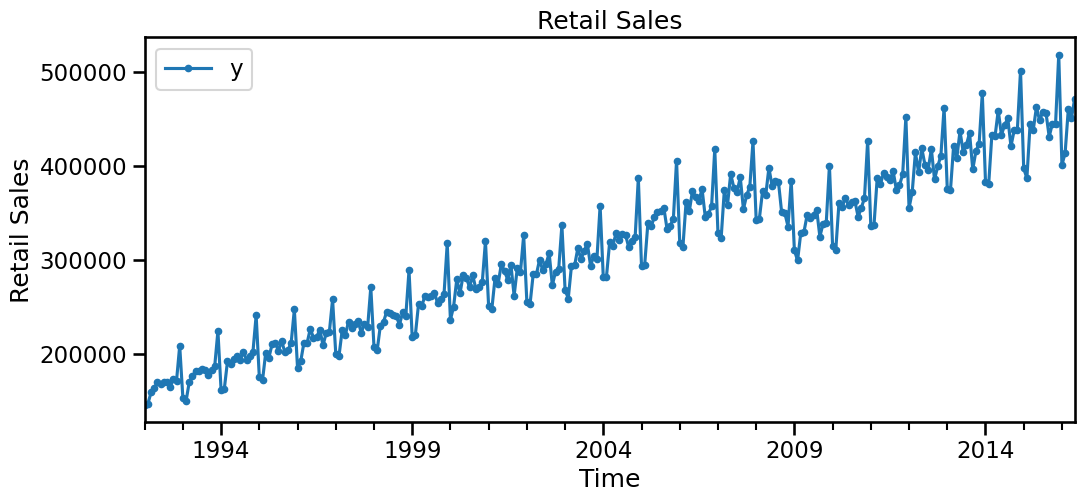

In [3]:
ax = df.plot(marker=".", figsize=[12, 5])
ax.set_title("Retail Sales")
ax.set_xlabel("Time")
ax.set_ylabel("Retail Sales")

In [4]:
# Perform the Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
# Assuming 'y' is the time series data column
result = adfuller(df['y'])

# Extracting the results
adf_statistic = result[0]
p_value = result[1]
used_lag = result[2]
n_obs = result[3]
critical_values = result[4]

{
    "ADF Statistic": adf_statistic,
    "p-value": p_value,
    "Number of Lags Used": used_lag,
    "Number of Observations Used": n_obs,
    "Critical Values": critical_values
}


{'ADF Statistic': -0.6443250505938619,
 'p-value': 0.8606486181958648,
 'Number of Lags Used': 15,
 'Number of Observations Used': 277,
 'Critical Values': {'1%': -3.4541800885158525,
  '5%': -2.872031361137725,
  '10%': -2.5723603999791473}}

**Conclusion:**

Since the ADF statistic is not more negative than the critical values at any significance level, and the p-value is quite high (0.8606), we fail to reject the null hypothesis. This indicates that the time series is **non-stationary**.


- The ADF test statistic is compared to these critical values. Since the ADF test statistic (-0.6443) is less negative than all the critical values (-3.4542, -2.8720, -2.5724), it means that the evidence is not strong enough to reject the null hypothesis.

In [5]:
# Load the new data file and parse the 'Date' column as datetime
df = pd.read_csv('daily-total-female-births.csv', parse_dates=['Date'])

# Set the 'Date' column as the index of the DataFrame
df.set_index('Date', inplace=True)

# Print the DataFrame to confirm the 'Date' column is now the index
df.head()



,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


Text(0, 0.5, 'Number of Births')

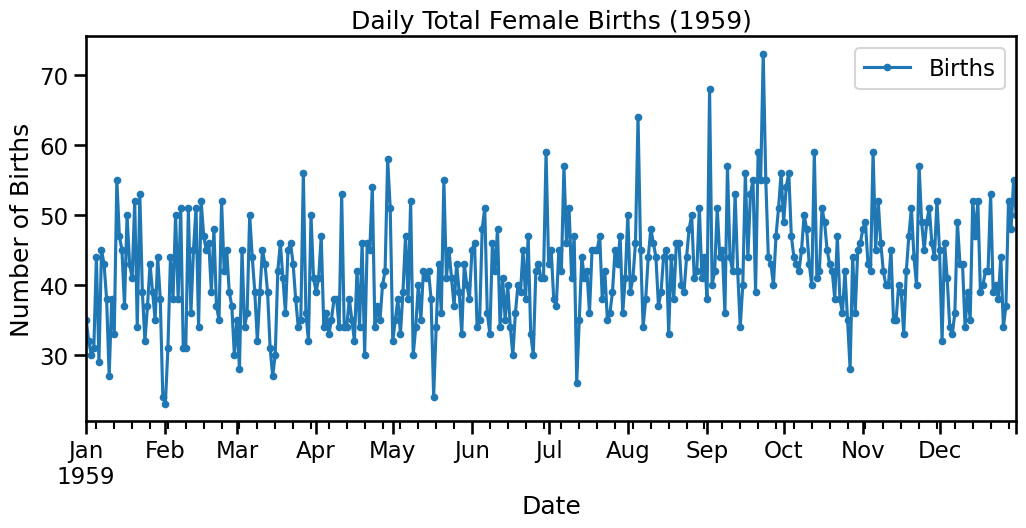

In [26]:
ax = df.plot(marker=".", figsize=[12, 5])
ax.set_title('Daily Total Female Births (1959)')
ax.set_xlabel("Date")
ax.set_ylabel("Number of Births")



In [6]:
# Perform the Augmented Dickey-Fuller test on the 'Births' column
result = adfuller(df['Births'])

# Extracting the results
adf_statistic = result[0]
p_value = result[1]
used_lag = result[2]
n_obs = result[3]
critical_values = result[4]

{
    "ADF Statistic": adf_statistic,
    "p-value": p_value,
    "Number of Lags Used": used_lag,
    "Number of Observations Used": n_obs,
    "Critical Values": critical_values
}


{'ADF Statistic': -4.808291253559764,
 'p-value': 5.2434129901498554e-05,
 'Number of Lags Used': 6,
 'Number of Observations Used': 358,
 'Critical Values': {'1%': -3.448748905151901,
  '5%': -2.8696473721448728,
  '10%': -2.5710891239349585}}

**Conclusion:**

Since the ADF statistic (-4.8083) is more negative than the critical values at all significance levels (1%, 5%, and 10%), and the p-value is extremely low (0.000052), **we reject the null hypothesis**. This indicates that the time series is **stationary**.


# Differencing

<ul style="font-size:20px; line-height:1.8;">
  <li><span style="color:blue;">First-order differencing</span> removes a <span style="color:red;">linear trend</span>.</li>
  <li><span style="color:blue;">Second-order differencing</span> removes <span style="color:red;">quadratic trends</span>.</li>
  <li><span style="color:blue;">Third-order differencing</span> removes <span style="color:red;">cubic trends</span>, and so on.</li>
  <li>The goal is to apply enough differencing to achieve <span style="color:red;">stationarity</span>, but without over-differencing, which could introduce unnecessary noise into the series.</li>
</ul>


In [7]:
df = pd.read_csv(
    "example_retail_sales.csv", parse_dates=["ds"], index_col=["ds"]
)
df.head()

# Calculate the first-order difference
first_order_diff_retail = df.diff().dropna()

# Create a table with the original values and their first-order differences
table_retail = pd.DataFrame({
    "Original Sales": df['y'],
    "First-Order Difference": first_order_diff_retail['y']
})

table_retail


,Original Sales,First-Order Difference
ds,,
1992-01-01,146376,NaN
1992-02-01,147079,703.0
1992-03-01,159336,12257.0
1992-04-01,163669,4333.0
1992-05-01,170068,6399.0
...,...,...
2016-01-01,400928,-117325.0
2016-02-01,413554,12626.0
2016-03-01,460093,46539.0


In [8]:
# Calculate the second-order difference
second_order_diff_retail = first_order_diff_retail.diff().dropna()
# Create a table with the original values and their first-order differences
table_retail = pd.DataFrame({
    "Original Sales": df['y'],
    "First-Order Difference": first_order_diff_retail['y'],
    "Second-Order Difference": second_order_diff_retail['y']
})

table_retail

,Original Sales,First-Order Difference,Second-Order Difference
ds,,,
1992-01-01,146376,NaN,NaN
1992-02-01,147079,703.0,NaN
1992-03-01,159336,12257.0,11554.0
1992-04-01,163669,4333.0,-7924.0
1992-05-01,170068,6399.0,2066.0
...,...,...,...
2016-01-01,400928,-117325.0,-191071.0
2016-02-01,413554,12626.0,129951.0
2016-03-01,460093,46539.0,33913.0


### Plotting First order difference

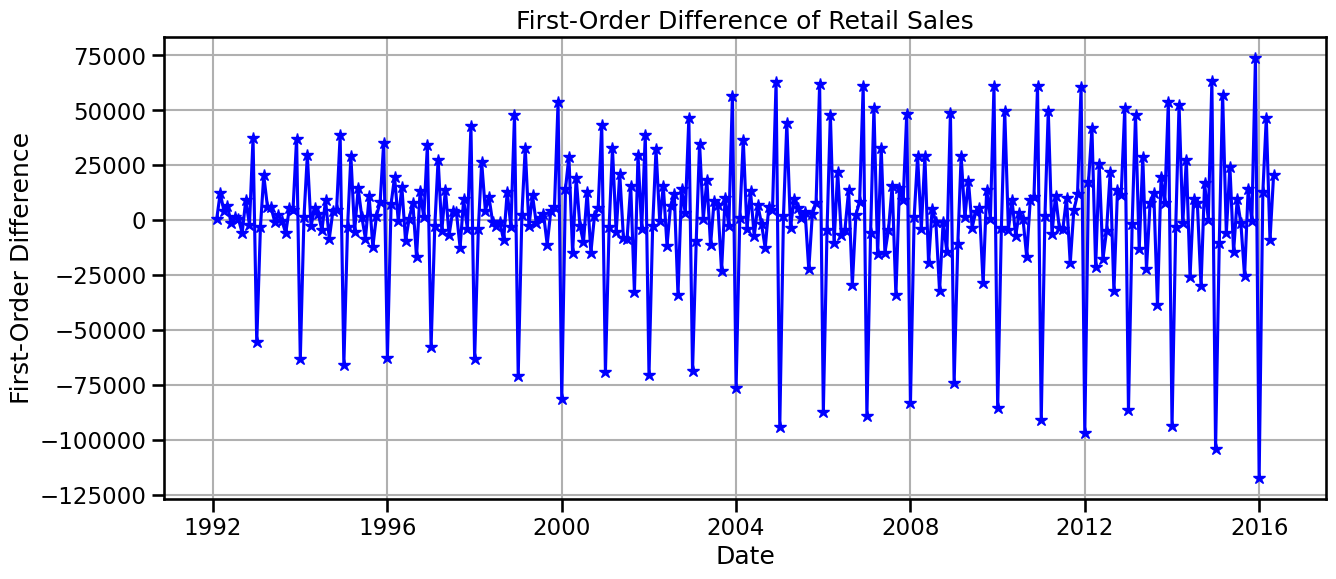

In [9]:
# Plot the first-order difference
plt.figure(figsize=(15, 6))
plt.plot(first_order_diff_retail.index, first_order_diff_retail['y'], marker='*', color='blue')
plt.title('First-Order Difference of Retail Sales')
plt.xlabel('Date')
plt.ylabel('First-Order Difference')
plt.grid(True)
plt.show()

### Plot Second order difference

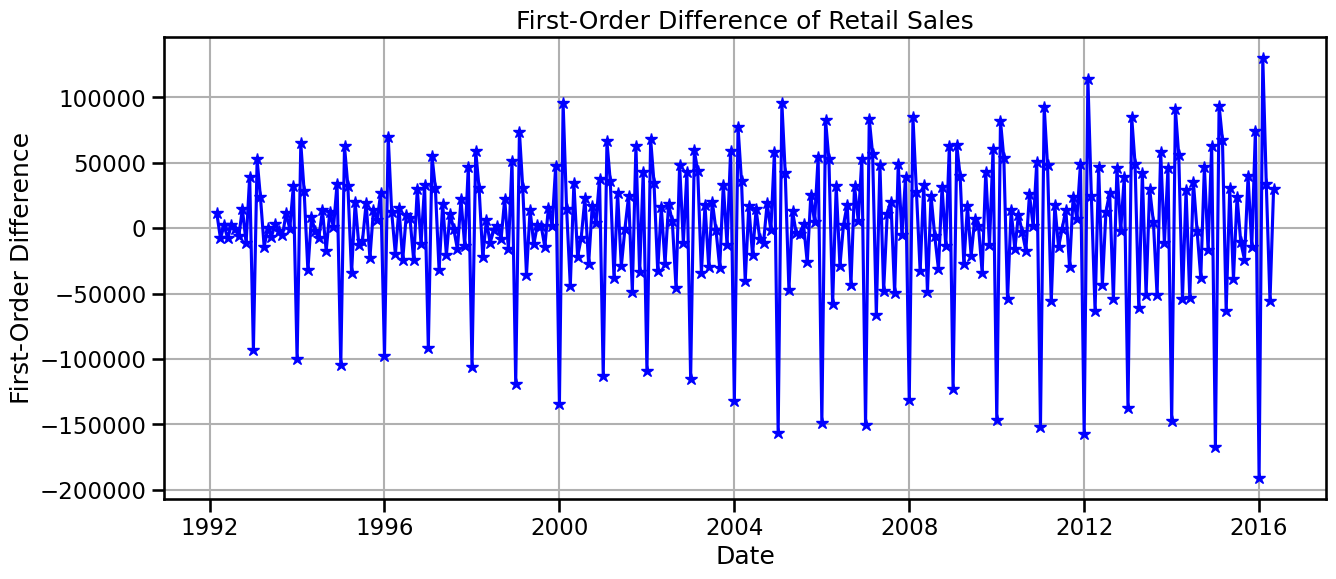

In [10]:
# Plot the first-order difference
plt.figure(figsize=(15, 6))
plt.plot(second_order_diff_retail.index, second_order_diff_retail['y'], marker='*', color='blue')
plt.title('First-Order Difference of Retail Sales')
plt.xlabel('Date')
plt.ylabel('First-Order Difference')
plt.grid(True)
plt.show()

# Stationarity Check after First Order Differecing 

In [32]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test on the first-order difference
adf_result = adfuller(first_order_diff_retail['y'])

# Extracting the results
adf_statistic = adf_result[0]
p_value = adf_result[1]
used_lag = adf_result[2]
n_obs = adf_result[3]
critical_values = adf_result[4]

{
    "ADF Statistic": adf_statistic,
    "p-value": p_value,
    "Number of Lags Used": used_lag,
    "Number of Observations Used": n_obs,
    "Critical Values": critical_values
}


{'ADF Statistic': -3.4379371543151027,
 'p-value': 0.009731610960262144,
 'Number of Lags Used': 14,
 'Number of Observations Used': 277,
 'Critical Values': {'1%': -3.4541800885158525,
  '5%': -2.872031361137725,
  '10%': -2.5723603999791473}}

**Conclusion:**

Since the ADF statistic (-3.4379) is more negative than the 5% and 10% critical values, and the p-value (0.0097) is less than 0.05, we reject the null hypothesis at the 5% significance level. This indicates that the first-order differenced series is **stationary**.


# Lag in Time Series

<ul style="font-size:20px; line-height:1.8;">
  <li>In time series analysis, a <span style="color:red;">lag</span> refers to the <span style="color:blue;">time difference</span> between observations.</li>
  <li>It essentially represents the relationship between an observation at a <span style="color:red;">current time</span> and an observation at a <span style="color:red;">previous time</span>.</li>
  <li><span style="color:red;">Lags</span> are used to understand and model <span style="color:blue;">dependencies</span> in time series data.</li>
</ul>


## Example of Lagged Features in Time Series Analysis

Suppose you are modeling the stock prices of a company. By examining the lagged values of stock prices, you can determine if past prices influence future prices. For instance:

| Date       | Stock Price $(y_t)$ | Lag 1 Price $(y_{t-1})$ | Lag 2 Price $(y_{t-2})$ |
|------------|---------------------|-------------------------|-------------------------|
| 2024-01-01 | 150                 | NaN                     | NaN                     |
| 2024-01-02 | 152                 | 150                     | NaN                     |
| 2024-01-03 | 155                 | 152                     | 150                     |
| 2024-01-04 | 153                 | 155                     | 152                     |
| 2024-01-05 | 157                 | 153                     | 155                     |

In this table:

- **"Lag 1 Price"** represents the stock price from one day before.
- **"Lag 2 Price"** represents the stock price from two days before.


- By including lagged values as features in your model, you can capture temporal dependencies and improve the accuracy of your predictions.

- Understanding lags and how to use them is crucial in time series analysis, as they form the basis for many time series forecasting models and techniques.


## General Representation

For a generic time $t$, the first three lags are represented as:

- $y_{t-1}$: Value of the time series at time $t-1$
- $y_{t-2}$: Value of the time series at time $t-2$
- $y_{t-3}$: Value of the time series at time $t-3$



# Forecasting as a Regression Using Lags

Forecasting a time series can be thought of as a regression problem where the future value of the series is predicted based on its past values. Specifically, we use the past observations (lags) of the time series to predict the future values.

For example, suppose we want to predict the value of a time series at time $t+1$. We can model this as:

<span style="font-size:24px; color:blue;">
$$
y_{t+1} = f(y_t, y_{t-1}, y_{t-2}, \dots, y_{t-k}) + \epsilon
$$
</span>

Here, 
- $y_{t+1}$ is the value we want to forecast.
- $y_t, y_{t-1}, y_{t-2}, \dots, y_{t-k}$ are the lagged values of the time series (i.e., the values at previous time steps).
- $f$ is a function that describes how the future value depends on the past values.
- $\epsilon$ represents the error term or noise, capturing the effect of all factors not included in the model.

<span style="font-size:24px; color:blue;">
$$
y_{t+1} = \beta_0 + \beta_1 y_t + \beta_2 y_{t-1} + \beta_3 y_{t-2} + \dots + \beta_k y_{t-k} + \epsilon
$$
</span>

Here, 
- $y_{t+1}$ is the value we want to forecast.
- $y_t, y_{t-1}, y_{t-2}, \dots, y_{t-k}$ are the lagged values of the time series (i.e., the values at previous time steps).
- $\beta_0, \beta_1, \beta_2, \dots, \beta_k$ are the coefficients that the model estimates, representing the impact of each lag on the forecast.
- $\epsilon$ represents the error term or noise, capturing the effect of all factors not included in the model.

## Why Use Lags?

Lags are used because they capture the underlying patterns in the data, such as trends, seasonality, and cycles. By including these lagged values, the model can "learn" from the past to predict the future.

## Questions to Consider

- **What if lags are highly correlated?**
  If the lagged values are highly correlated with each other (multicollinearity), the model may become unstable and produce poor forecasts. It’s important to check for multicollinearity when building such models.

- **How many lags should be included?**
  The choice of how many lags to include ($k$) is crucial. Including too few may miss important patterns, while including too many can lead to overfitting.

- **Is the relationship linear?**
  The function $f$ can be linear or nonlinear. For example, in an AR (AutoRegressive) model, $f$ is linear, but other models like neural networks can capture nonlinear relationships.



In [33]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# Load the CSV file
file_path = 'AirPassenger.csv'
df = pd.read_csv(file_path)

# Convert 'Year-Month' to datetime
df['Year-Month'] = pd.to_datetime(df['Year-Month'], format='%Y-%b')

# Create 4 lag columns
for i in range(1, 13):
    df[f'Lag_{i}'] = df['Pax'].shift(i)

#df.head(10)

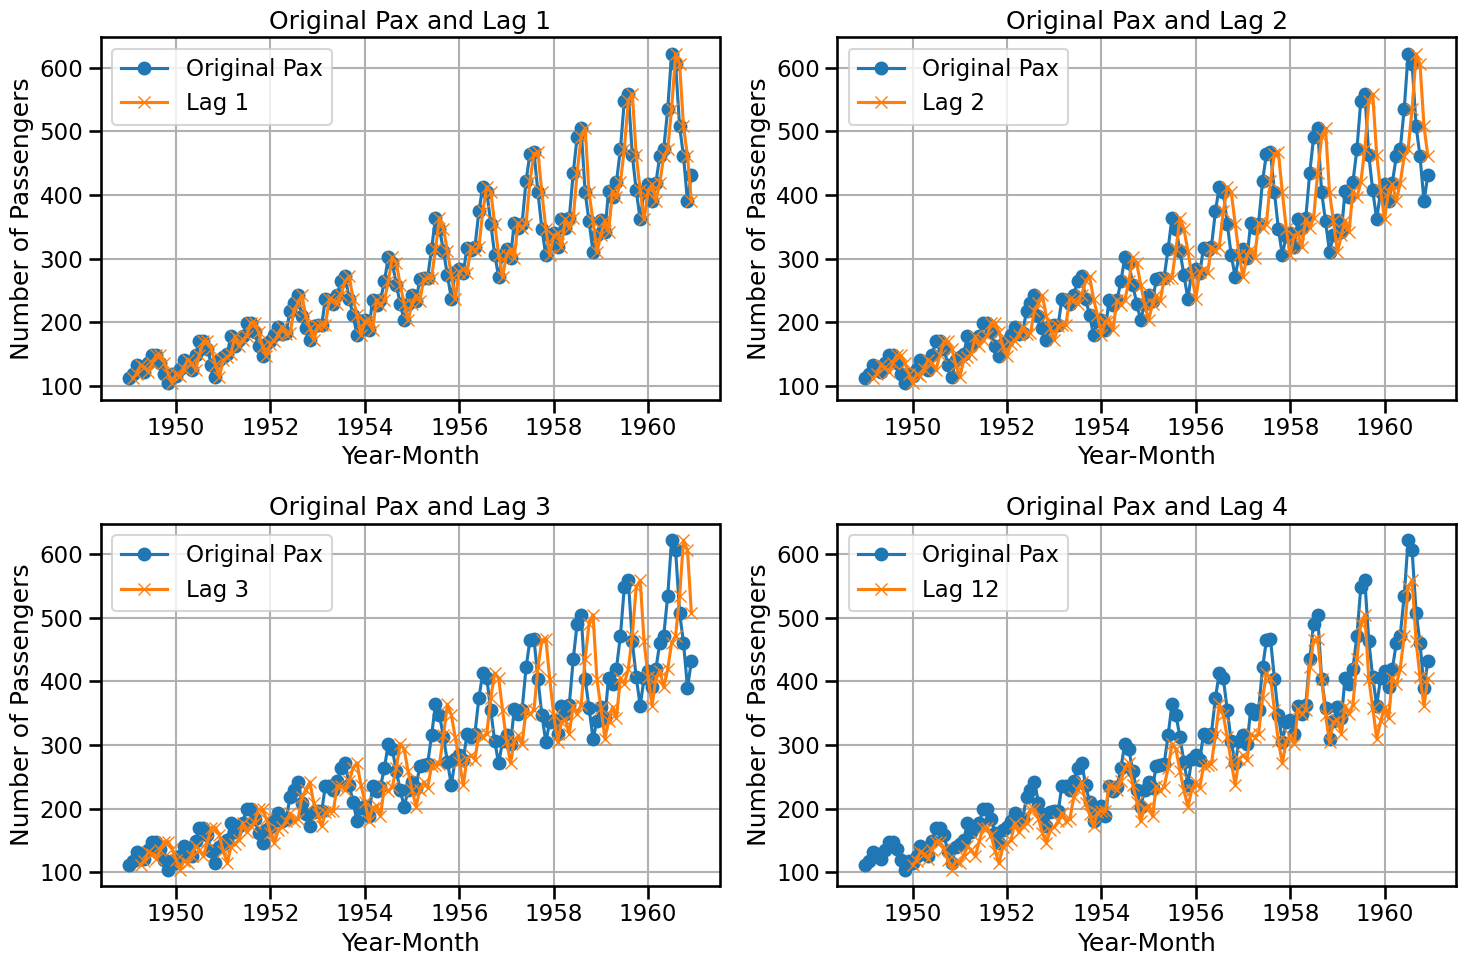

In [14]:
# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot Original and Lag 1
axs[0, 0].plot(df['Year-Month'], df['Pax'], label='Original Pax', marker='o')
axs[0, 0].plot(df['Year-Month'], df['Lag_1'], label='Lag 1', marker='x')
axs[0, 0].set_title('Original Pax and Lag 1')
axs[0, 0].set_xlabel('Year-Month')
axs[0, 0].set_ylabel('Number of Passengers')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot Original and Lag 2
axs[0, 1].plot(df['Year-Month'], df['Pax'], label='Original Pax', marker='o')
axs[0, 1].plot(df['Year-Month'], df['Lag_2'], label='Lag 2', marker='x')
axs[0, 1].set_title('Original Pax and Lag 2')
axs[0, 1].set_xlabel('Year-Month')
axs[0, 1].set_ylabel('Number of Passengers')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Plot Original and Lag 3
axs[1, 0].plot(df['Year-Month'], df['Pax'], label='Original Pax', marker='o')
axs[1, 0].plot(df['Year-Month'], df['Lag_3'], label='Lag 3', marker='x')
axs[1, 0].set_title('Original Pax and Lag 3')
axs[1, 0].set_xlabel('Year-Month')
axs[1, 0].set_ylabel('Number of Passengers')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Plot Original and Lag 4
axs[1, 1].plot(df['Year-Month'], df['Pax'], label='Original Pax', marker='o')
axs[1, 1].plot(df['Year-Month'], df['Lag_12'], label='Lag 12', marker='x')
axs[1, 1].set_title('Original Pax and Lag 4')
axs[1, 1].set_xlabel('Year-Month')
axs[1, 1].set_ylabel('Number of Passengers')
axs[1, 1].legend()
axs[1, 1].grid(True)



# Adjust layout
plt.tight_layout()
plt.show()


# Autocorrelation in Time Series

Autocorrelation in time series analysis measures the correlation between observations of the time series at different times.

It helps identify patterns such as trends or seasonal effects within the data. 
    

### Formula for Autocorrelation




The autocorrelation function (ACF) at lag $k$, denoted as $\rho_k$, is given by:

<span style="font-size:24px; color:blue;">
    
$ \large \rho_k = \frac{\sum_{t=k+1}^{n} (y_t - \bar{y})(y_{t-k} - \bar{y})}{\sum_{t=1}^{n} (y_t - \bar{y})^2} $
</span>

where:
- $y_t$ is the value at time $t$.
- $\bar{y}$ is the mean of the time series.
- $n$ is the total number of observations.
- $k$ is the lag.

### Expanding the Formula for $k = 1$ and $n = 4$

Let's expand the formula for $k = 1$ and $n = 4$:

$$ \rho_1 = \frac{\sum_{t=2}^{4} (y_t - \bar{y})(y_{t-1} - \bar{y})}{\sum_{t=1}^{4} (y_t - \bar{y})^2} $$

For $t=2$, $t=3$, and $t=4$:

$$ \rho_1 = \frac{(y_2 - \bar{y})(y_1 - \bar{y}) + (y_3 - \bar{y})(y_2 - \bar{y}) + (y_4 - \bar{y})(y_3 - \bar{y})}{(y_1 - \bar{y})^2 + (y_2 - \bar{y})^2 + (y_3 - \bar{y})^2 + (y_4 - \bar{y})^2} $$

Simplifying the numerator and denominator:

**Numerator:**

$$ (y_2 - \bar{y})(y_1 - \bar{y}) + (y_3 - \bar{y})(y_2 - \bar{y}) + (y_4 - \bar{y})(y_3 - \bar{y}) $$

**Denominator:**

$$ (y_1 - \bar{y})^2 + (y_2 - \bar{y})^2 + (y_3 - \bar{y})^2 + (y_4 - \bar{y})^2 $$

By plugging in the actual values of $y_t$ and $\bar{y}$, we can calculate the autocorrelation $\rho_1$ for the given time series.


### Example Time Series with 5 Observations

Consider a time series with the following 5 observations:

| Time ($t$) | Value ($y_t$) |
|------------|---------------|
| 1          | 10            |
| 2          | 12            |
| 3          | 13            |
| 4          | 15            |
| 5          | 14            |

### Step-by-Step Calculation

1. **Calculate the Mean ($\bar{y}$)**:
   
   $ \bar{y} = \frac{10 + 12 + 13 + 15 + 14}{5} = \frac{64}{5} = 12.8 $

2. **Calculate the Autocorrelation for Lag 1 ($\rho_1$)**:

   $
   \rho_1 = \frac{\sum_{t=2}^{5} (y_t - \bar{y})(y_{t-1} - \bar{y})}{\sum_{t=1}^{5} (y_t - \bar{y})^2}
   $

   - For $t=2$: $(y_2 - \bar{y})(y_1 - \bar{y}) = (12 - 12.8)(10 - 12.8) = (-0.8)(-2.8) = 2.24$
   - For $t=3$: $(y_3 - \bar{y})(y_2 - \bar{y}) = (13 - 12.8)(12 - 12.8) = 0.2(-0.8) = -0.16$
   - For $t=4$: $(y_4 - \bar{y})(y_3 - \bar{y}) = (15 - 12.8)(13 - 12.8) = 2.2(0.2) = 0.44$
   - For $t=5$: $(y_5 - \bar{y})(y_4 - \bar{y}) = (14 - 12.8)(15 - 12.8) = 1.2(2.2) = 2.64$

   Sum of numerator terms: $2.24 - 0.16 + 0.44 + 2.64 = 5.16$

   - Denominator: $\sum_{t=1}^{5} (y_t - \bar{y})^2$
     - $(y_1 - \bar{y})^2 = (10 - 12.8)^2 = 7.84$
     - $(y_2 - \bar{y})^2 = (12 - 12.8)^2 = 0.64$
     - $(y_3 - \bar{y})^2 = (13 - 12.8)^2 = 0.04$
     - $(y_4 - \bar{y})^2 = (15 - 12.8)^2 = 4.84$
     - $(y_5 - \bar{y})^2 = (14 - 12.8)^2 = 1.44$

     Sum of denominator terms: $7.84 + 0.64 + 0.04 + 4.84 + 1.44 = 14.8$

   - Autocorrelation for Lag 1 ($\rho_1$):
     $
     \rho_1 = \frac{5.16}{14.8} \approx 0.35
     $



The autocorrelation for lag 1 ($\rho_1$) of the example time series is approximately 0.35, indicating a moderate positive correlation between the values separated by one time period.

# **Partial Autocorrelation**

**Partial autocorrelation** measures the correlation between a time series and its lagged values, after removing the effects of the intermediate lags. In simpler terms, it tells us how much a value in a time series is influenced by a specific lagged value, **excluding the influence** of any other values in between.

**Formula for Partial Autocorrelation:**

The partial autocorrelation at lag $k$, denoted as $PACF(k)$, can be computed using the formula:

**PACF(k) = Correlation between $X_t$ and $X_{t-k}$ after removing effects of $X_{t-1}, X_{t-2}, ..., X_{t-(k-1)}$**

### **Manually Computing Partial Autocorrelation using 5 Data Points:**

Suppose we have 5 data points: $X_1, X_2, X_3, X_4, X_5$. To compute the partial autocorrelation for lag 2, $PACF(2)$:

1. **Step 1:** First, calculate the correlation between $X_3$ and $X_1$.

2. **Step 2:** Next, remove the effect of $X_2$ on both $X_3$ and $X_1$ by regressing $X_3$ on $X_2$ and $X_1$ on $X_2$. 

3. **Step 3:** Finally, compute the correlation between the residuals from these regressions.

This final value is the **Partial Autocorrelation** at lag 2.

**Key Point:** Partial autocorrelation helps in understanding the direct influence of past values on future values, making it a crucial tool in time series analysis.


# Formula for Partial Autocorrelation (PACF)

The Partial Autocorrelation Function (PACF) at lag $k$ is defined as the correlation between $y_t$ and $y_{t-k}$, after controlling for the effects of lags $1$ through $k-1$.

For lag $k$, the PACF is given by:

<span style="font-size:24px; color:blue;">
$$
\phi_k = \text{corr}(y_t, y_{t-k} \,|\, y_{t-1}, y_{t-2}, \dots, y_{t-(k-1)})
$$
</span>

This means that the PACF at lag $k$ measures the correlation between $y_t$ and $y_{t-k}$ after removing the effects of the intermediate lags $y_{t-1}, y_{t-2}, \dots, y_{t-(k-1)}$.

## Expanding for Lag 2

For lag 2, the PACF is:

<span style="font-size:24px; color:pink;">
$$
\phi_2 = \text{corr}(y_t, y_{t-2} \,|\, y_{t-1})
$$
</span>

This expression can be expanded using the formula for partial correlation, involving the regression coefficients of $y_t$ on $y_{t-1}$ and $y_{t-2}$:

<span style="font-size:24px; color:pink;">
$$
\phi_2 = \frac{\text{corr}(y_t, y_{t-2}) - \text{corr}(y_t, y_{t-1}) \times \text{corr}(y_{t-1}, y_{t-2})}{\sqrt{(1 - \text{corr}(y_t, y_{t-1})^2) \times (1 - \text{corr}(y_{t-1}, y_{t-2})^2)}}
$$
</span>

This formula shows how to calculate the partial autocorrelation at lag 2 by removing the influence of the intermediate lag 1.


This formula shows how to calculate the partial autocorrelation at lag 2 by removing the influence of the intermediate lag 1.


In [36]:
# Extract the relevant column
time_series = df['Pax']

# Calculate autocorrelation for lags 1 to 12
autocorrelations = [time_series.autocorr(lag) for lag in range(1, 13)]

# Create a list of strings with the autocorrelation values for each lag
autocorrelation_strings = [f"Autocorrelation with lag {lag} is {autocorrelation:.4f}" for lag, autocorrelation in enumerate(autocorrelations, start=1)]

# Print the strings
autocorrelation_strings


['Autocorrelation with lag 1 is 0.9602',
 'Autocorrelation with lag 2 is 0.8957',
 'Autocorrelation with lag 3 is 0.8374',
 'Autocorrelation with lag 4 is 0.7977',
 'Autocorrelation with lag 5 is 0.7859',
 'Autocorrelation with lag 6 is 0.7839',
 'Autocorrelation with lag 7 is 0.7846',
 'Autocorrelation with lag 8 is 0.7922',
 'Autocorrelation with lag 9 is 0.8279',
 'Autocorrelation with lag 10 is 0.8827',
 'Autocorrelation with lag 11 is 0.9497',
 'Autocorrelation with lag 12 is 0.9905']

In [15]:
from statsmodels.tsa.stattools import pacf

# Extract the relevant column
time_series = df['Pax']

# Calculate partial autocorrelation for lags 1 to 12
partial_autocorrelations = pacf(time_series, nlags=12)

# Create a list of strings with the partial autocorrelation values for each lag
partial_autocorrelation_strings = [f"Partial Autocorrelation with lag {lag} is {partial_autocorrelation:.4f}" for lag, partial_autocorrelation in enumerate(partial_autocorrelations[1:], start=1)]

# Print the strings
partial_autocorrelation_strings


['Partial Autocorrelation with lag 1 is 0.9547',
 'Partial Autocorrelation with lag 2 is -0.2653',
 'Partial Autocorrelation with lag 3 is 0.0555',
 'Partial Autocorrelation with lag 4 is 0.1089',
 'Partial Autocorrelation with lag 5 is 0.0811',
 'Partial Autocorrelation with lag 6 is 0.0041',
 'Partial Autocorrelation with lag 7 is 0.1562',
 'Partial Autocorrelation with lag 8 is 0.1037',
 'Partial Autocorrelation with lag 9 is 0.2888',
 'Partial Autocorrelation with lag 10 is 0.2069',
 'Partial Autocorrelation with lag 11 is 0.2411',
 'Partial Autocorrelation with lag 12 is -0.1580']

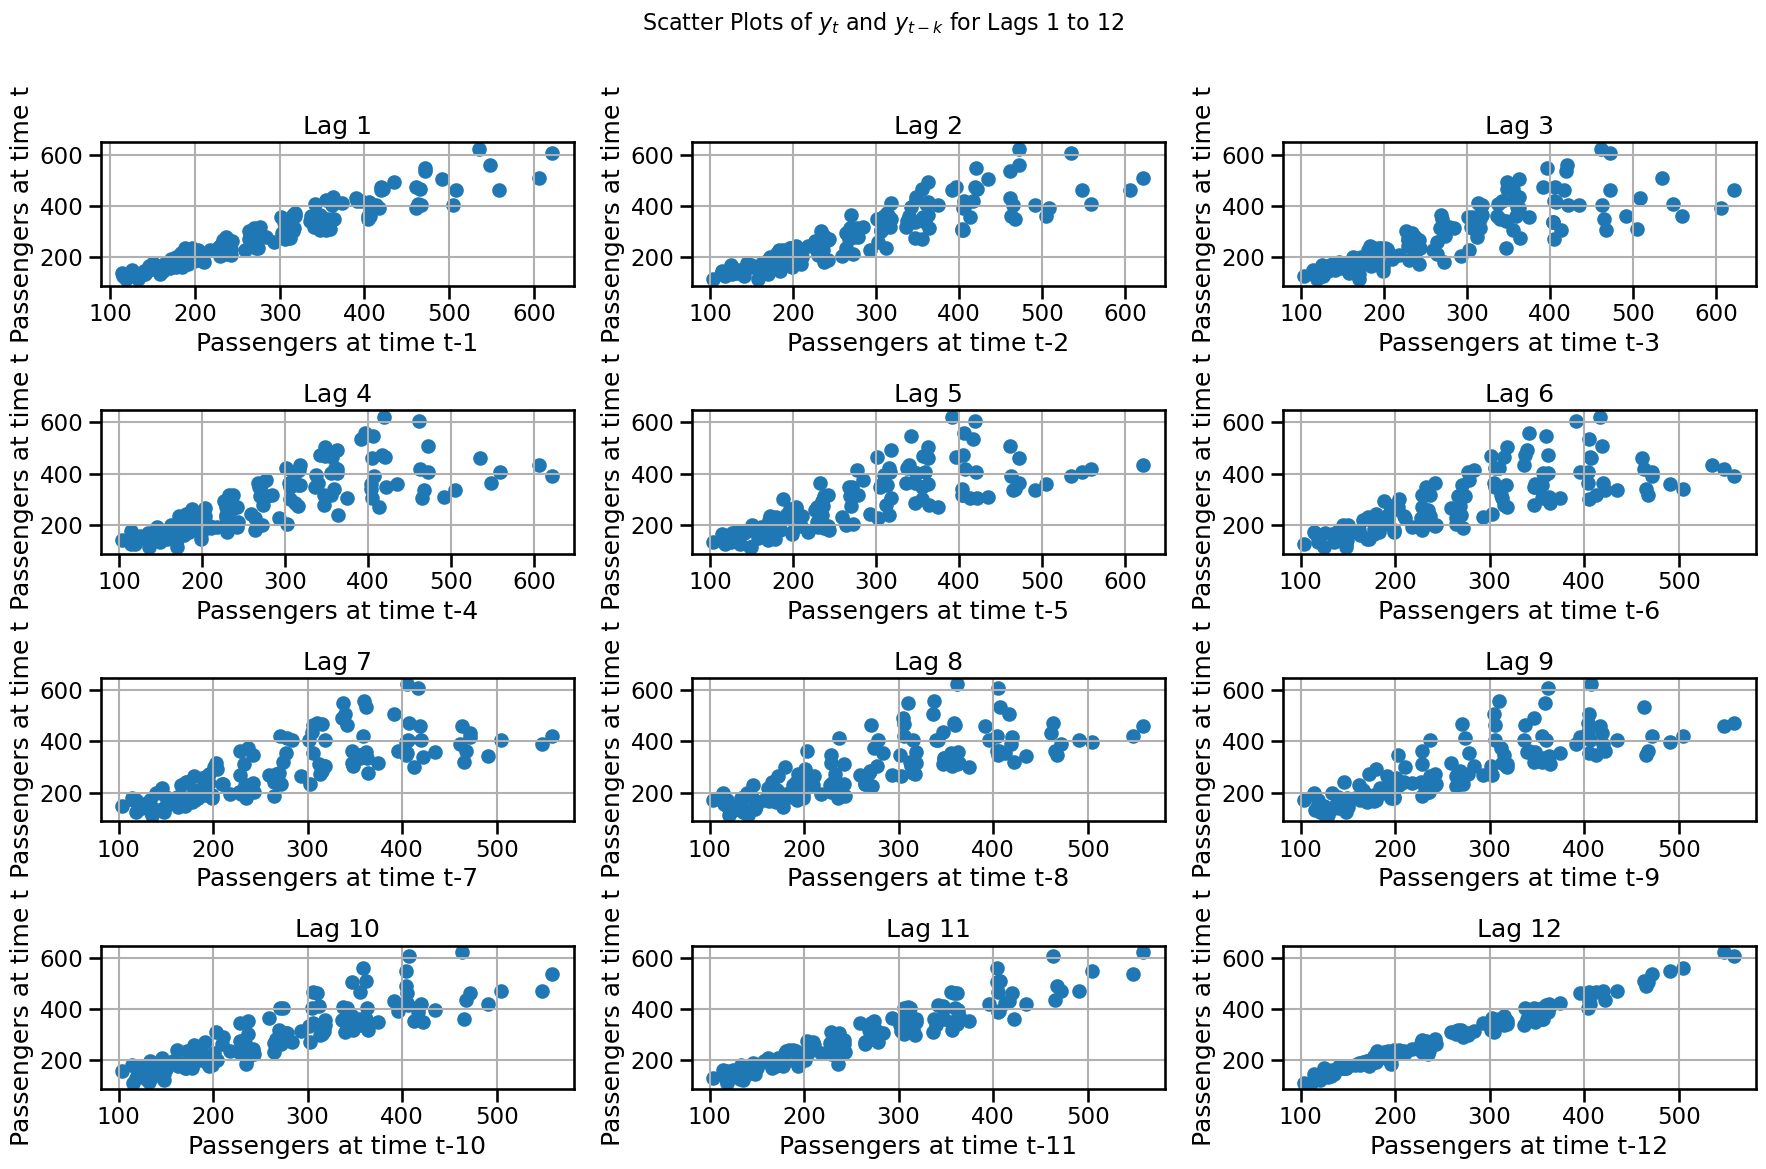

In [16]:
# Create subplots
fig, axes = plt.subplots(4, 3, figsize=(18, 12))
fig.suptitle('Scatter Plots of $y_t$ and $y_{t-k}$ for Lags 1 to 12', fontsize=16)

# Generate scatter plots for lags 1 to 12
for lag in range(1, 13):
    df[f'Pax_Lag{lag}'] = df['Pax'].shift(lag)
    scatter_data = df.dropna()
    ax = axes[(lag-1) // 3, (lag-1) % 3]
    ax.scatter(scatter_data[f'Pax_Lag{lag}'], scatter_data['Pax'])
    ax.set_xlabel(f'Passengers at time t-{lag}')
    ax.set_ylabel('Passengers at time t')
    ax.set_title(f'Lag {lag}')
    ax.grid(True)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


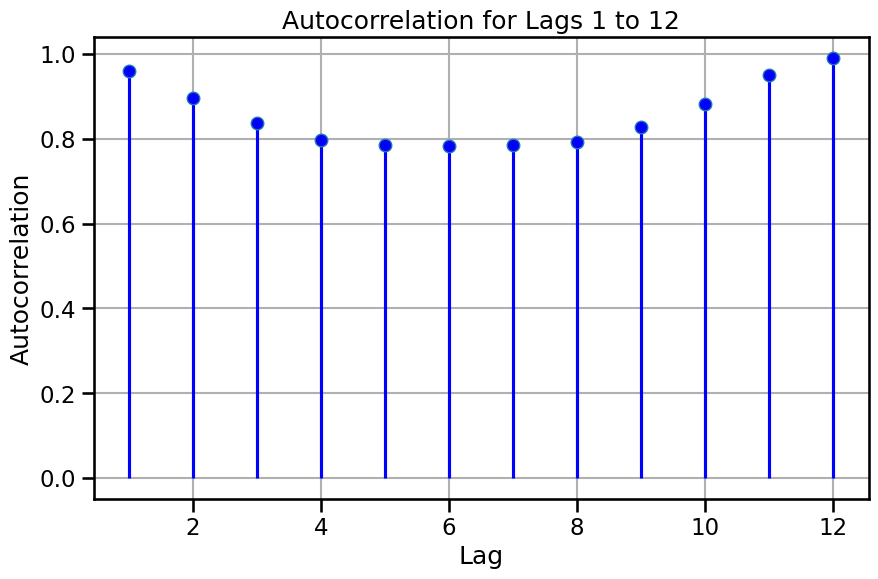

In [17]:
autocorrelations_lag12 = [time_series.autocorr(lag) for lag in range(1, 13)]
# Create a stem plot for the autocorrelations from lag 1 to 12 without the deprecated parameter
plt.figure(figsize=(10, 6))
markerline, stemlines, baseline = plt.stem(range(1, 13), autocorrelations_lag12, basefmt=" ")
plt.setp(markerline, 'markerfacecolor', 'b')
plt.setp(stemlines, 'color', 'b')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation for Lags 1 to 12')
plt.grid(True)
plt.show()


In [21]:
# Create a list of strings with the autocorrelation values for each specified lag
autocorrelation_specific_strings = [f"At lag {lag}, autocorrelation is {autocorrelation:.4f}" for lag, autocorrelation in autocorrelations_specific.items()]

# Print the strings
autocorrelation_specific_strings


['At lag 12, autocorrelation is 0.9905',
 'At lag 24, autocorrelation is 0.9833',
 'At lag 36, autocorrelation is 0.9773',
 'At lag 48, autocorrelation is 0.9770',
 'At lag 60, autocorrelation is 0.9633']

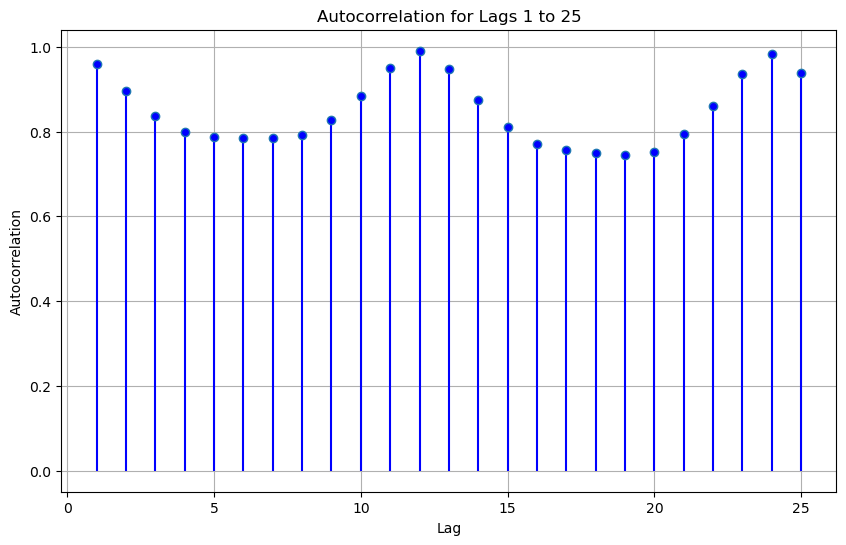

In [25]:
# Calculate autocorrelation for lags 1 to 25
autocorrelations_lag25 = [time_series.autocorr(lag) for lag in range(1, 26)]

# Create a stem plot for the autocorrelations from lag 1 to 25
plt.figure(figsize=(10, 6))
markerline, stemlines, baseline = plt.stem(range(1, 26), autocorrelations_lag25, basefmt=" ")
plt.setp(markerline, 'markerfacecolor', 'b')
plt.setp(stemlines, 'color', 'b')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation for Lags 1 to 25')
plt.grid(True)
plt.show()


In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_context("talk")

# White noise

In [27]:
num_timesteps = 300  # Length of time series we want.
np.random.seed(0)  # Ensures we generate the same random numbers every time.

y = np.random.normal(loc=0, scale=1, size=num_timesteps)
ts = pd.date_range(start="2000-01-01", periods=num_timesteps, freq="D")

df = pd.DataFrame(data={"y": y}, index=ts)
df.head()

,y
2000-01-01,1.764052
2000-01-02,0.400157
2000-01-03,0.978738
2000-01-04,2.240893
2000-01-05,1.867558


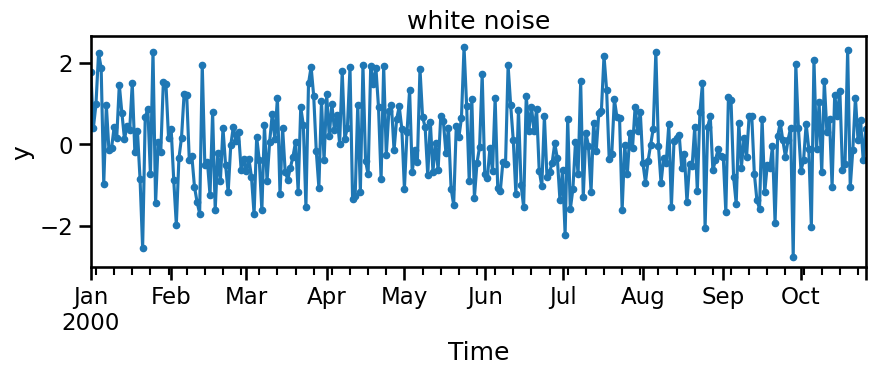

In [28]:
ax = df.plot(figsize=[10, 3], legend=None, marker=".")
ax.set_title("white noise")
ax.set_ylabel("y")
ax.set_xlabel("Time")
plt.show()

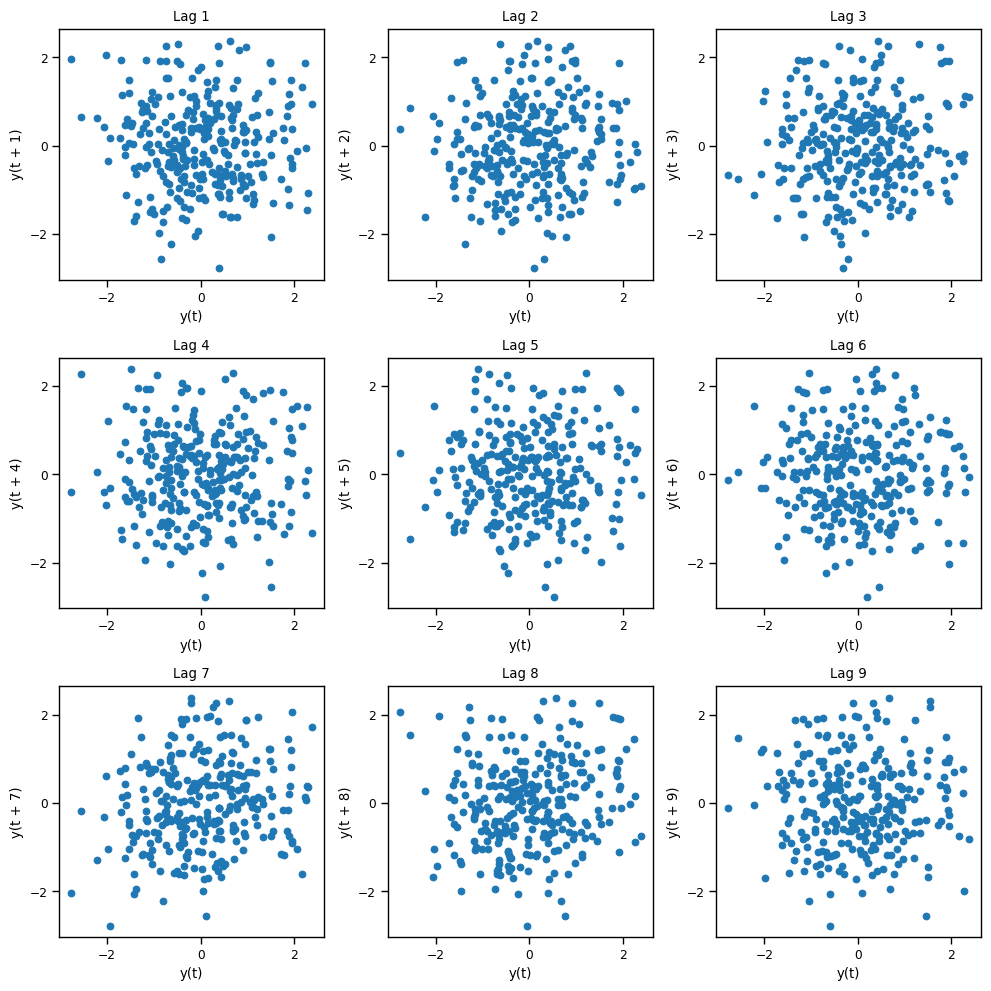

In [29]:
with sns.plotting_context("paper"): # Sets the plotting format for these specific plots.
    fig, ax = plt.subplots(nrows=3, ncols=3, figsize=[10, 10])
    for i, ax_ in enumerate(ax.flatten()):
        pd.plotting.lag_plot(df["y"], lag=i + 1, ax=ax_)
        ax_.set_title(f"Lag {i+1}")
        ax_.ticklabel_format(style="sci", scilimits=(0, 0))
    plt.tight_layout()

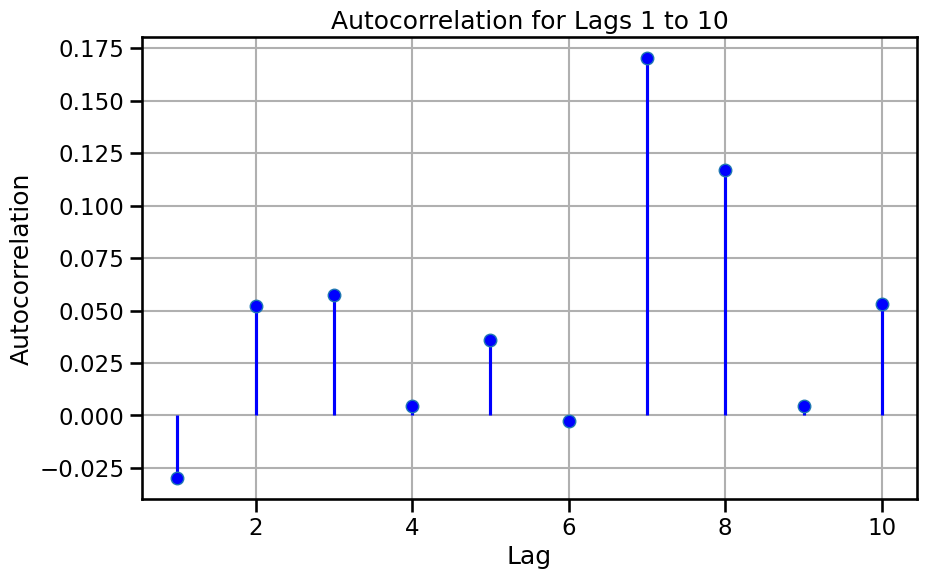

In [30]:
# Calculate autocorrelation for lags 1 to 10
autocorrelations = [df['y'].autocorr(lag) for lag in range(1, 11)]

# Create a stem plot for the autocorrelations from lag 1 to 10
plt.figure(figsize=(10, 6))
markerline, stemlines, baseline = plt.stem(range(1, 11), autocorrelations, basefmt=" ")
plt.setp(markerline, 'markerfacecolor', 'b')
plt.setp(stemlines, 'color', 'b')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation for Lags 1 to 10')
plt.grid(True)
plt.show()


### Quick Decay to Zero
- **Behavior:** The ACF decays to zero quickly, often within a few lags.
- **Inference:** The data is likely stationary. 
- This behavior indicates that the current value is not strongly dependent on past values, 
- implying that the series is closer to white noise.

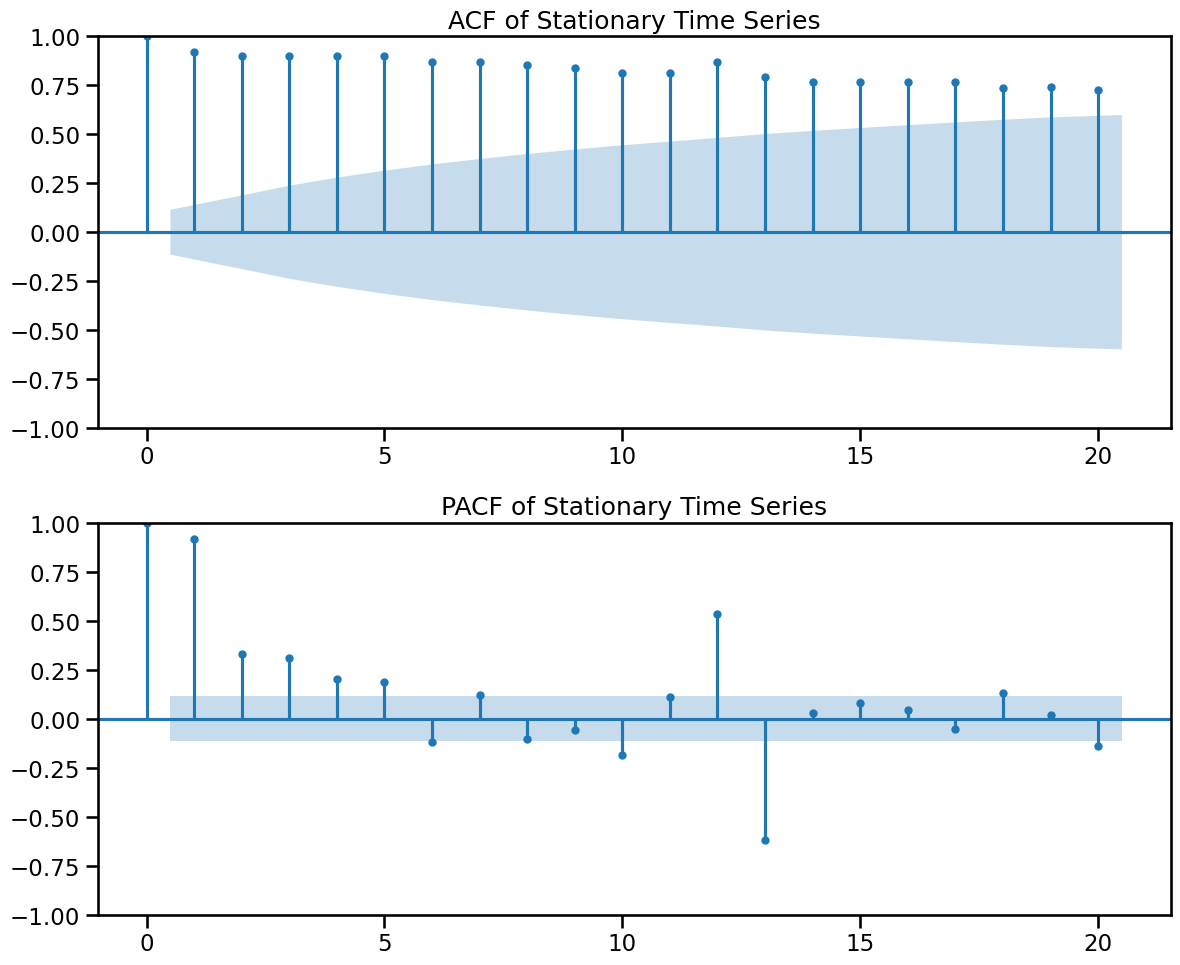

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
df = pd.read_csv(
    "example_retail_sales.csv", parse_dates=["ds"], index_col=["ds"]
)
df.head()
# Plot ACF and PACF
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# ACF plot
plot_acf(df['y'], ax=axes[0], lags=20)
axes[0].set_title('ACF of Stationary Time Series')

# PACF plot
plot_pacf(df['y'], ax=axes[1], lags=20)
axes[1].set_title('PACF of Stationary Time Series')

plt.tight_layout()
plt.show()


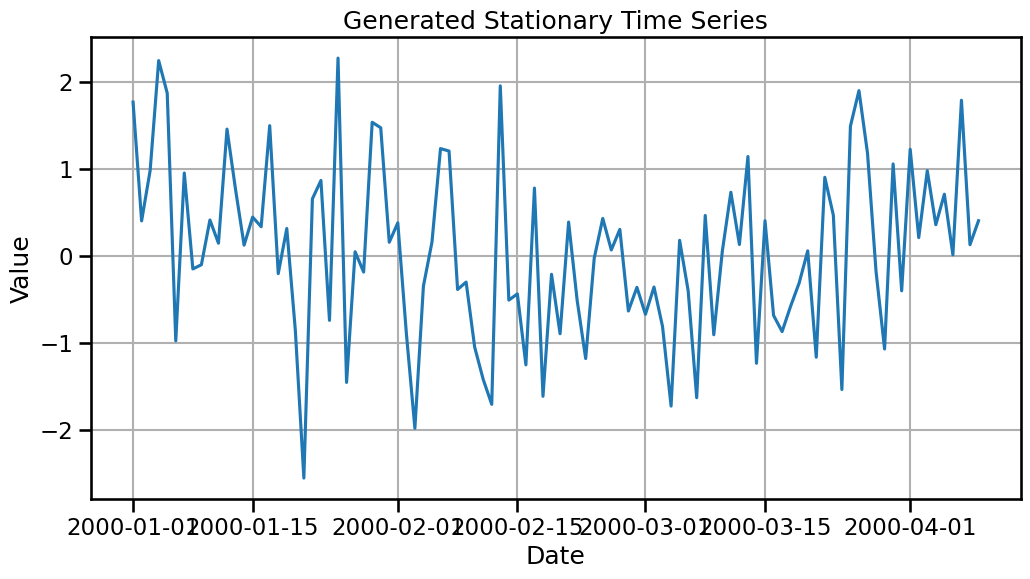

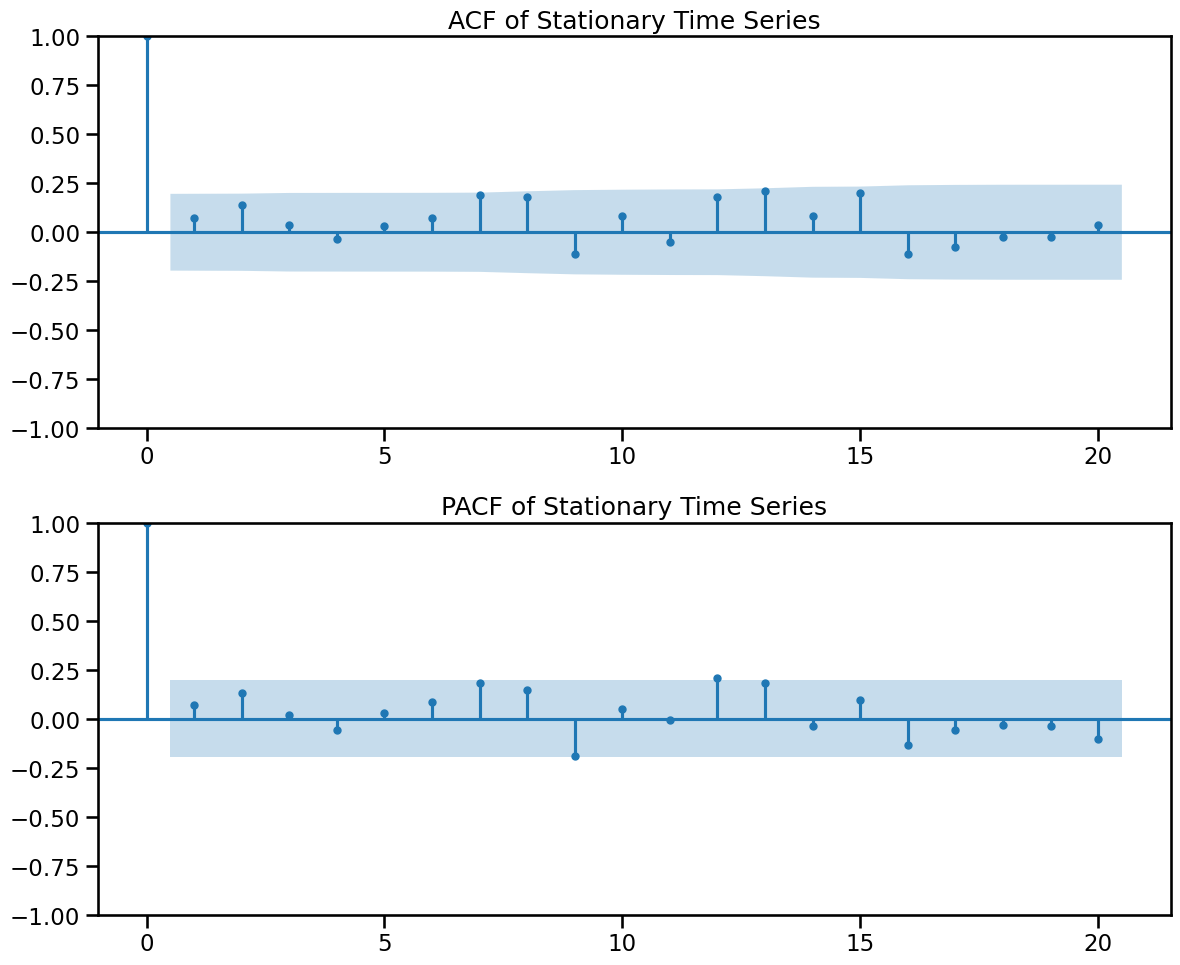

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Set the context for plots
sns.set_context("talk")

# Generate a stationary time series (white noise)
np.random.seed(0)
num_timesteps = 100
y = np.random.normal(loc=0, scale=1, size=num_timesteps)
ts = pd.date_range(start="2000-01-01", periods=num_timesteps, freq="D")

# Create DataFrame
df = pd.DataFrame(data={"y": y}, index=ts)

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['y'])
plt.title('Generated Stationary Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# Plot ACF and PACF
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# ACF plot
plot_acf(df['y'], ax=axes[0], lags=20)
axes[0].set_title('ACF of Stationary Time Series')

# PACF plot
plot_pacf(df['y'], ax=axes[1], lags=20)
axes[1].set_title('PACF of Stationary Time Series')

plt.tight_layout()
plt.show()


- Even in a perfectly stationary series, some random fluctuations can cause a few lag values to show significant PACF peaks
  purely by chance. 
- This does not necessarily imply non-stationarity.
- White noise processes are expected to have PACF values within the confidence bands, finite sample sizes can sometimes result in apparent significant peaks.

### Slow Decay
- **Behavior:** The ACF decays slowly, taking many lags to approach zero.
- **Inference:** The data may have a trend or be non-stationary. 
- This suggests that values are correlated over longer periods, indicating a persistent effect.

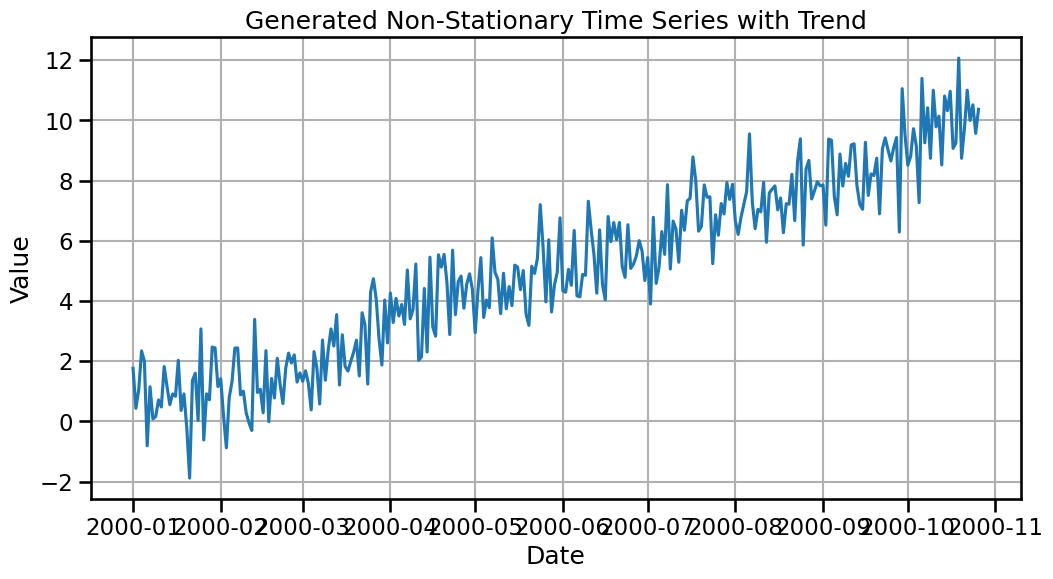

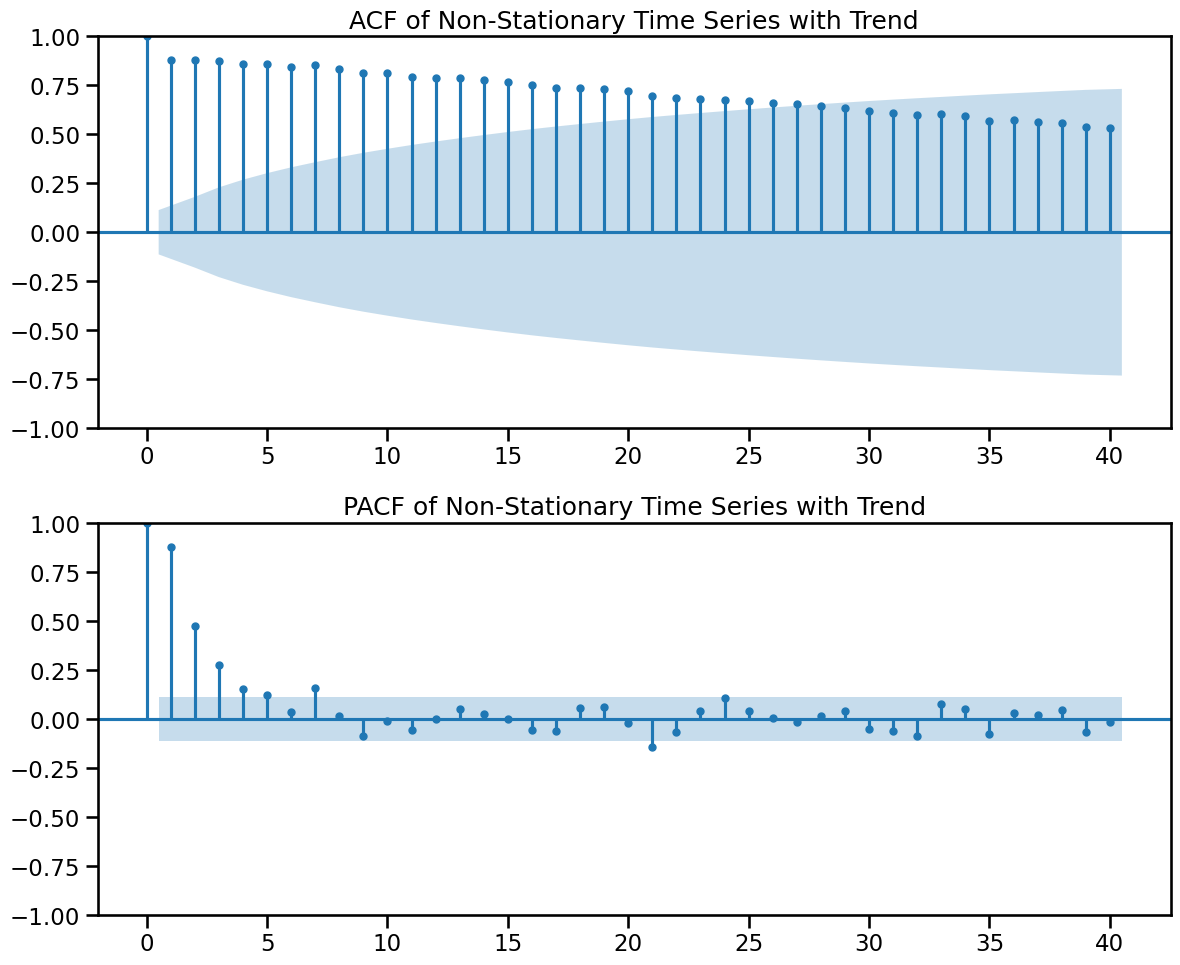

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Set the context for plots
sns.set_context("talk")

# Generate a non-stationary time series with a trend
np.random.seed(0)
num_timesteps = 300
trend = np.linspace(0, 10, num_timesteps)  # Linear trend
y = np.random.normal(loc=0, scale=1, size=num_timesteps) + trend
ts = pd.date_range(start="2000-01-01", periods=num_timesteps, freq="D")

# Create DataFrame
df = pd.DataFrame(data={"y": y}, index=ts)

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['y'])
plt.title('Generated Non-Stationary Time Series with Trend')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# Plot ACF and PACF
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# ACF plot
plot_acf(df['y'], ax=axes[0], lags=40)
axes[0].set_title('ACF of Non-Stationary Time Series with Trend')

# PACF plot
plot_pacf(df['y'], ax=axes[1], lags=40)
axes[1].set_title('PACF of Non-Stationary Time Series with Trend')

plt.tight_layout()
plt.show()


### Significant Seasonal Peaks
- **Behavior:** The ACF shows significant peaks at regular intervals (e.g., at lag 12 for monthly data with an annual cycle).
- **Inference:** The data has a strong seasonal component. The periodic peaks correspond to the seasonality period.

<bound method NDFrame.head of                    y
2000-01-01  1.764052
2000-01-02  2.486125
2000-01-03  5.058899
2000-01-04  8.135733
2000-01-05  9.317725
...              ...
2000-10-22 -6.313276
2000-10-23 -5.797115
2000-10-24 -3.497207
2000-10-25 -2.485417
2000-10-26  0.370056

[300 rows x 1 columns]>


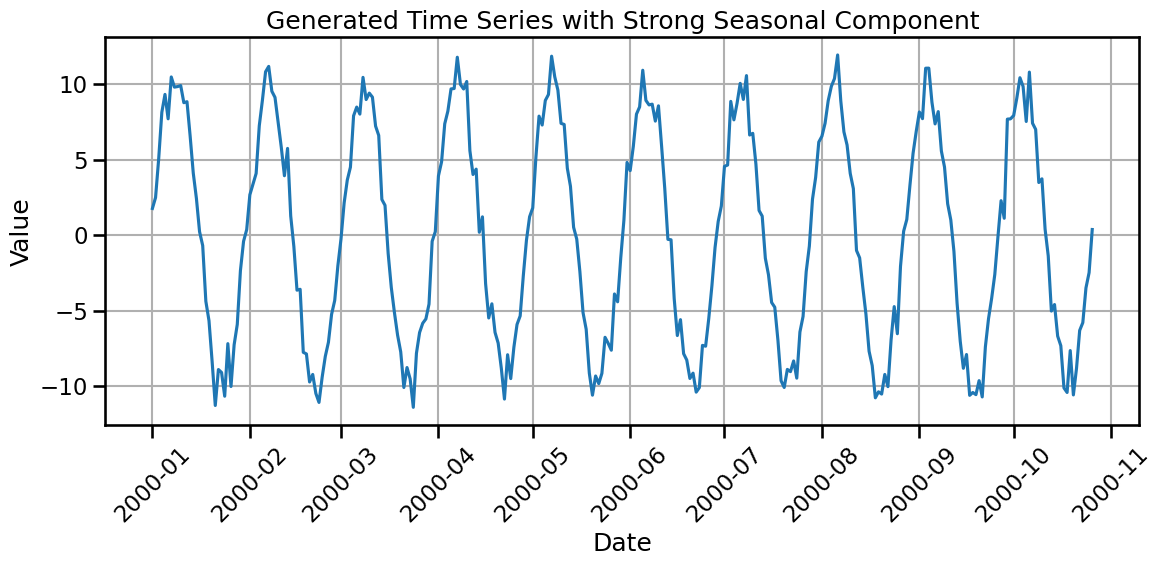

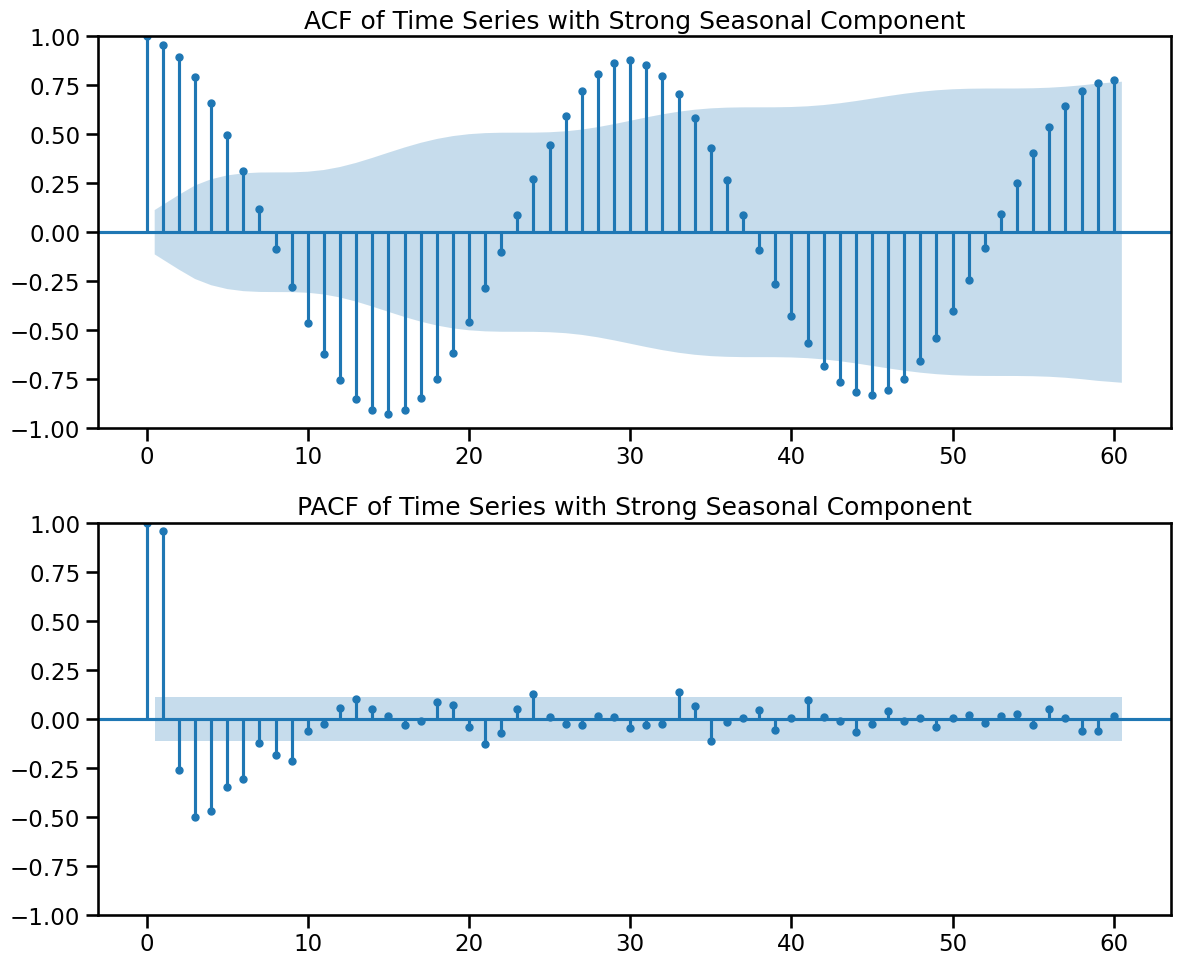

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Set the context for plots
sns.set_context("talk")

# Generate a time series with a strong seasonal component
np.random.seed(0)
num_timesteps = 300
seasonal_period = 30  # Example: monthly seasonality in daily data
seasonal_effect = 10 * np.sin(np.linspace(0, 2 * np.pi * num_timesteps / seasonal_period, num_timesteps))
y = np.random.normal(loc=0, scale=1, size=num_timesteps) + seasonal_effect
ts = pd.date_range(start="2000-01-01", periods=num_timesteps, freq="D")

# Create DataFrame
df = pd.DataFrame(data={"y": y}, index=ts)
print(df.head)
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['y'])
plt.title('Generated Time Series with Strong Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Plot ACF and PACF
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# ACF plot
plot_acf(df['y'], ax=axes[0], lags=60)
axes[0].set_title('ACF of Time Series with Strong Seasonal Component')

# PACF plot
plot_pacf(df['y'], ax=axes[1], lags=60)
axes[1].set_title('PACF of Time Series with Strong Seasonal Component')

plt.tight_layout()
plt.show()


### Exponential Decay or Sine Wave Pattern
- **Behavior:** The ACF decays exponentially or shows a sine wave pattern.
- **Inference:** The data may follow an autoregressive (AR) or autoregressive moving average (ARMA) process. The pattern indicates a cyclic or damped cyclic behavior.

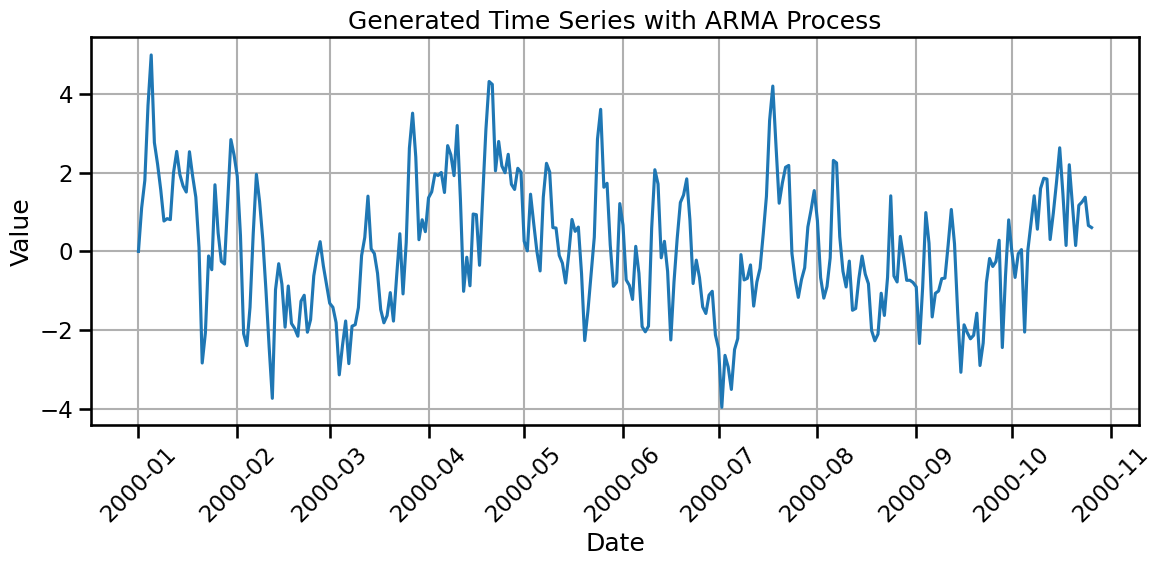

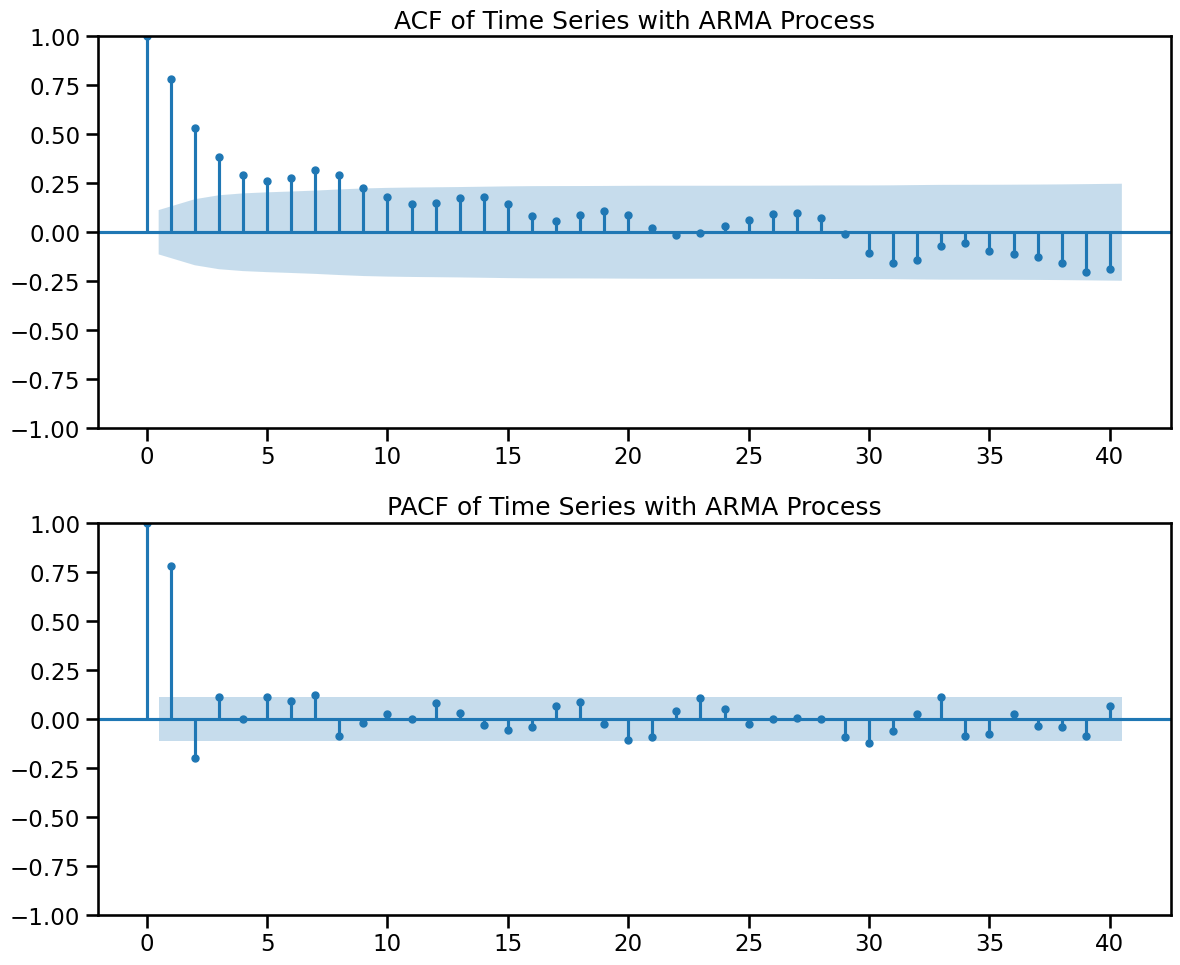

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Set the context for plots
sns.set_context("talk")

# Generate a time series with an ARMA process to exhibit exponential decay or sine wave pattern in ACF
np.random.seed(0)
num_timesteps = 300

# ARMA process parameters
phi = 0.6  # AR coefficient
theta = 0.4  # MA coefficient

# Generate white noise
epsilon = np.random.normal(size=num_timesteps)

# Generate ARMA process
y = np.zeros(num_timesteps)
for t in range(1, num_timesteps):
    y[t] = phi * y[t-1] + theta * epsilon[t-1] + epsilon[t]

ts = pd.date_range(start="2000-01-01", periods=num_timesteps, freq="D")

# Create DataFrame
df = pd.DataFrame(data={"y": y}, index=ts)

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['y'])
plt.title('Generated Time Series with ARMA Process')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot ACF and PACF
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# ACF plot
plot_acf(df['y'], ax=axes[0], lags=40)
axes[0].set_title('ACF of Time Series with ARMA Process')

# PACF plot
plot_pacf(df['y'], ax=axes[1], lags=40)
axes[1].set_title('PACF of Time Series with ARMA Process')

plt.tight_layout()
plt.show()


### No Decay
- **Behavior:** The ACF remains high and does not decay towards zero.
- **Inference:** The data is non-stationary, often due to a strong trend. Differencing the series might be necessary to achieve stationarity.

[*********************100%%**********************]  1 of 1 completed


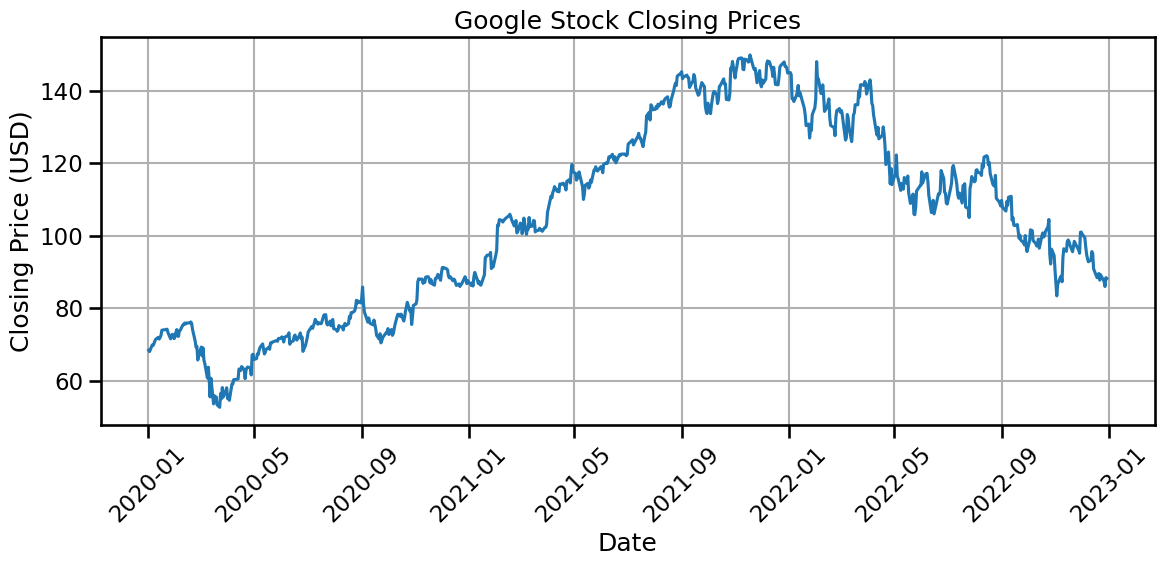

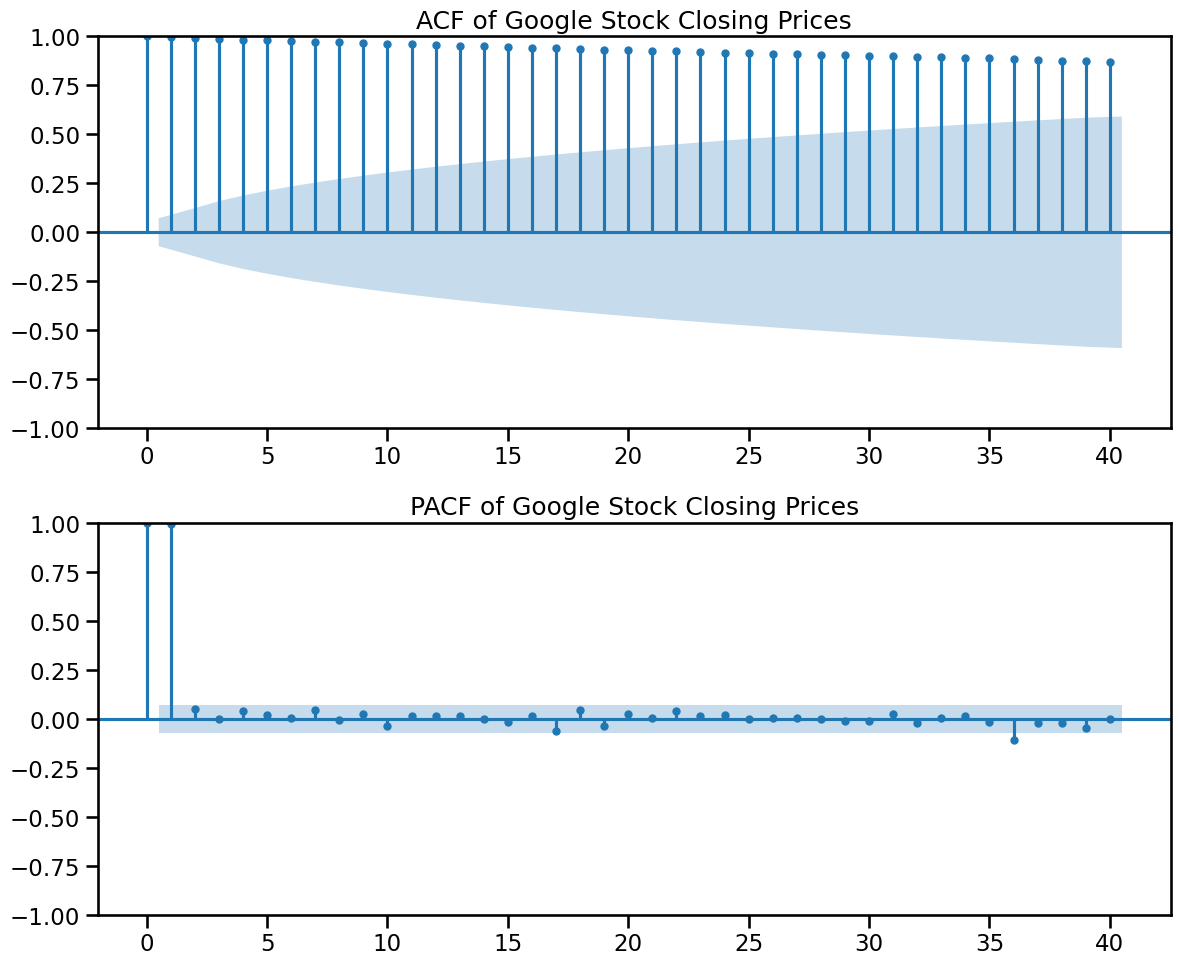

In [5]:
#!pip install yfinance

import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Download Google stock data using yfinance
ticker = 'GOOGL'
stock_data = yf.download(ticker, start="2020-01-01", end="2023-01-01")

# Plot the closing prices
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'])
plt.title('Google Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot ACF and PACF
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# ACF plot
plot_acf(stock_data['Close'], ax=axes[0], lags=40)
axes[0].set_title('ACF of Google Stock Closing Prices')

# PACF plot
plot_pacf(stock_data['Close'], ax=axes[1], lags=40)
axes[1].set_title('PACF of Google Stock Closing Prices')

plt.tight_layout()
plt.show()


[*********************100%%**********************]  3 of 3 completed


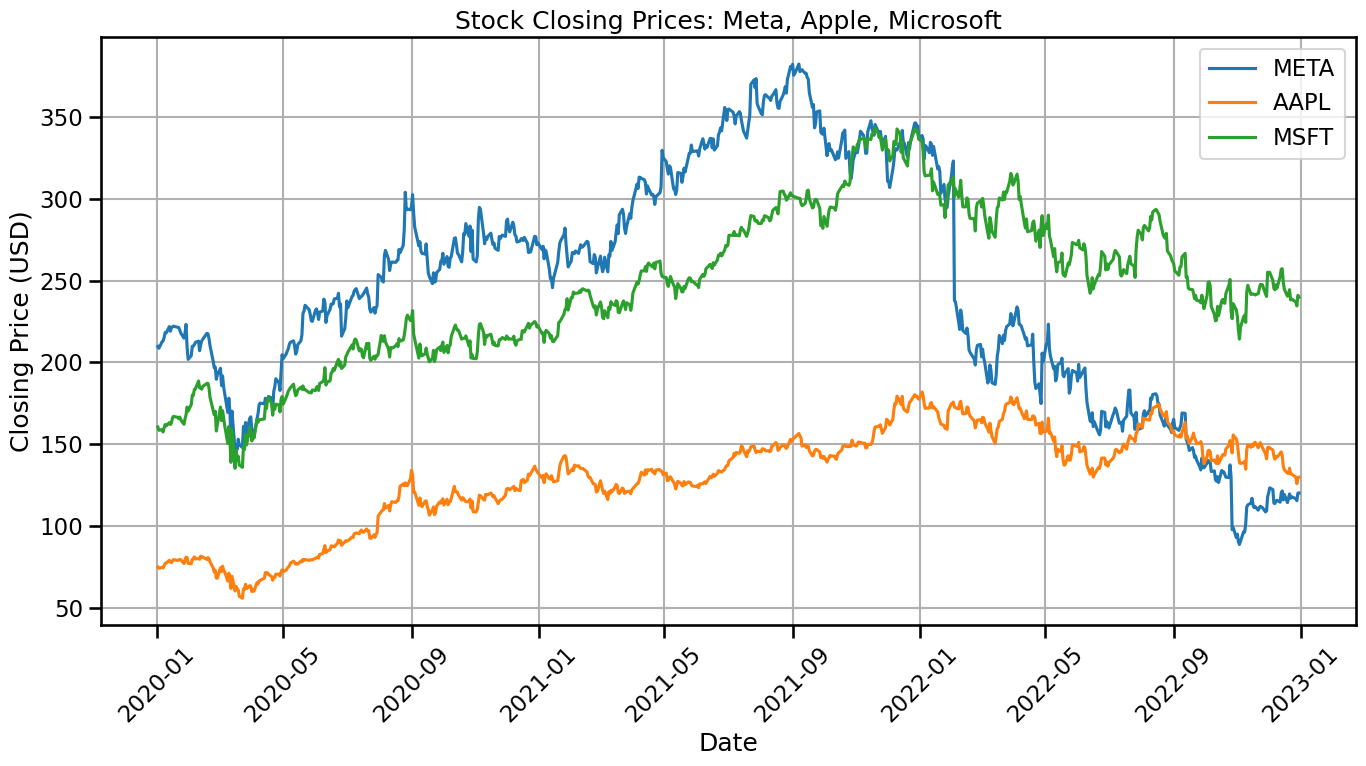

In [7]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the tickers and the date range
tickers = ['META', 'AAPL', 'MSFT']
start_date = "2020-01-01"
end_date = "2023-01-01"

# Download the stock data
stock_data = yf.download(tickers, start=start_date, end=end_date)['Close']

# Plot the closing prices for each stock
plt.figure(figsize=(14, 8))
for ticker in tickers:
    plt.plot(stock_data.index, stock_data[ticker], label=ticker)

plt.title('Stock Closing Prices: Meta, Apple, Microsoft')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Sharp Cutoff
- **Behavior:** The ACF cuts off sharply after a few lags (typically after lag q).
- **Inference:** The data may follow a moving average (MA) process. This behavior suggests that the current value is only correlated with values within a limited number of past periods.

### Alternating Positive and Negative Values
- **Behavior:** The ACF shows alternating positive and negative values.
- **Inference:** This indicates a possible cyclical pattern in the data. 
- The cycle length can be identified by the lag at which the ACF values change sign.

## Example of ACF Behaviors

Let's consider some common scenarios:

### Stationary Series:
- **Behavior**: ACF decays quickly, indicating that past values have little influence on future values.

### Non-Stationary Series:
- **Behavior**: ACF decays slowly, suggesting that past values have a long-lasting influence, often due to trends or seasonality.

### Seasonal Series:
- **Behavior**: ACF shows peaks at seasonal intervals, indicating repeating patterns over fixed periods.

### AR(1) Process:
- **Behavior**: ACF decays exponentially, with the PACF showing a sharp cutoff after lag 1.

### MA(1) Process:
- **Behavior**: ACF cuts off sharply after lag 1, with the PACF decaying exponentially.


| Terms | ACF             | PACF                |
|-------|-----------------|---------------------|
| AR    | Geometric       | \( p \) significant lags |
| MA    | \( q \) significant lags | Geometric          |
| ARMA  | Geometric       | Geometric           |


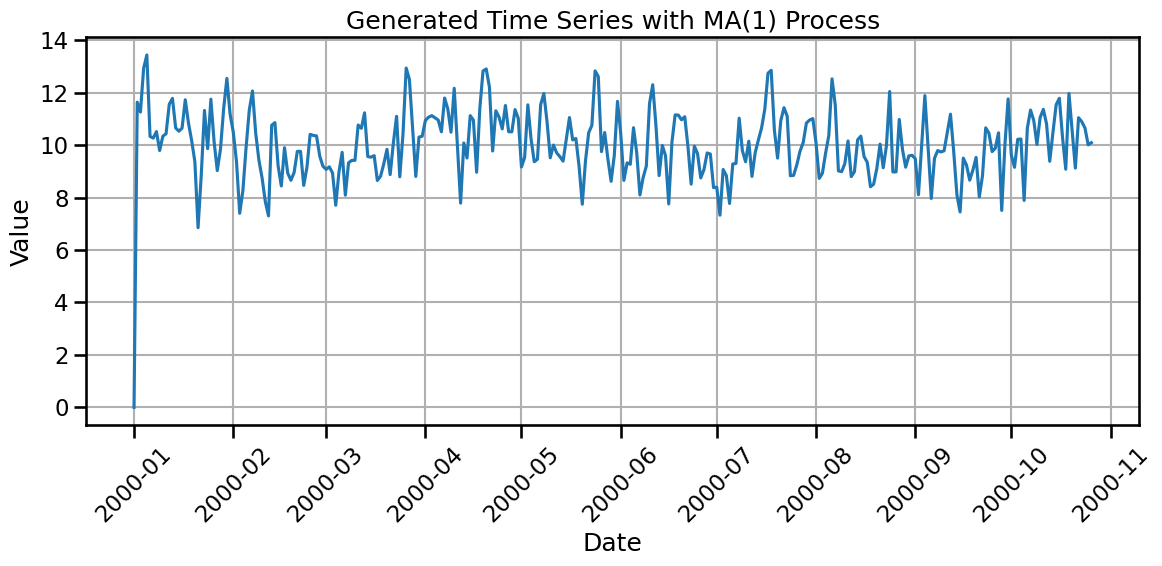

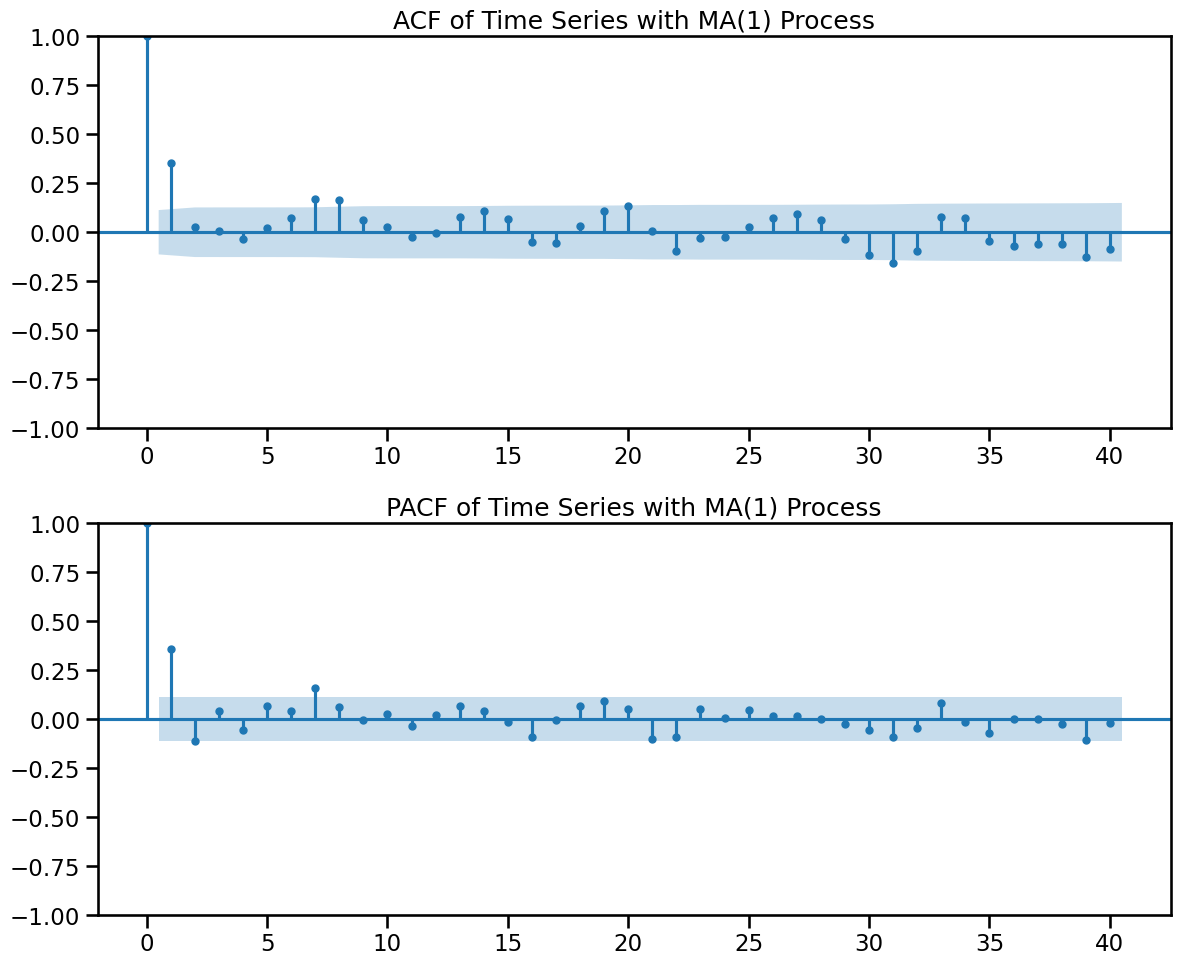

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# MA(1) process parameters
theta = 0.7  # MA(1) coefficient
mu = 10     # Mean of the process
num_timesteps = 300

# Generate white noise
np.random.seed(0)
epsilon = np.random.normal(size=num_timesteps)

# Generate MA(1) process
y = np.zeros(num_timesteps)
for t in range(1, num_timesteps):
    y[t] = mu + epsilon[t] + theta * epsilon[t-1]

ts = pd.date_range(start="2000-01-01", periods=num_timesteps, freq="D")

# Create DataFrame
df = pd.DataFrame(data={"y": y}, index=ts)

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['y'])
plt.title('Generated Time Series with MA(1) Process')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot ACF and PACF
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# ACF plot
plot_acf(df['y'], ax=axes[0], lags=40)
axes[0].set_title('ACF of Time Series with MA(1) Process')

# PACF plot
plot_pacf(df['y'], ax=axes[1], lags=40)
axes[1].set_title('PACF of Time Series with MA(1) Process')

plt.tight_layout()
plt.show()


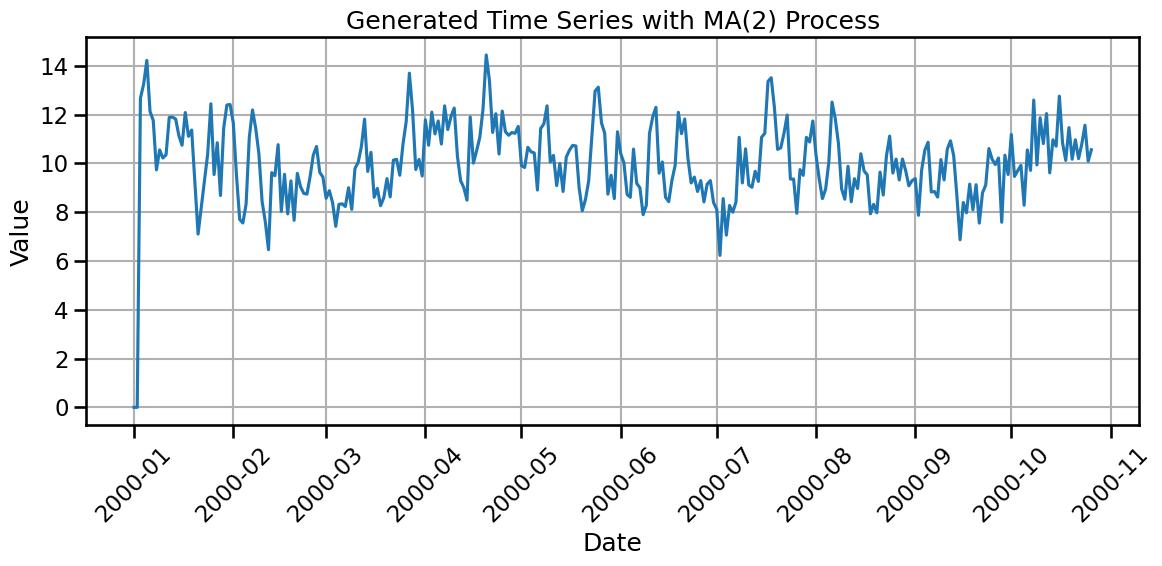

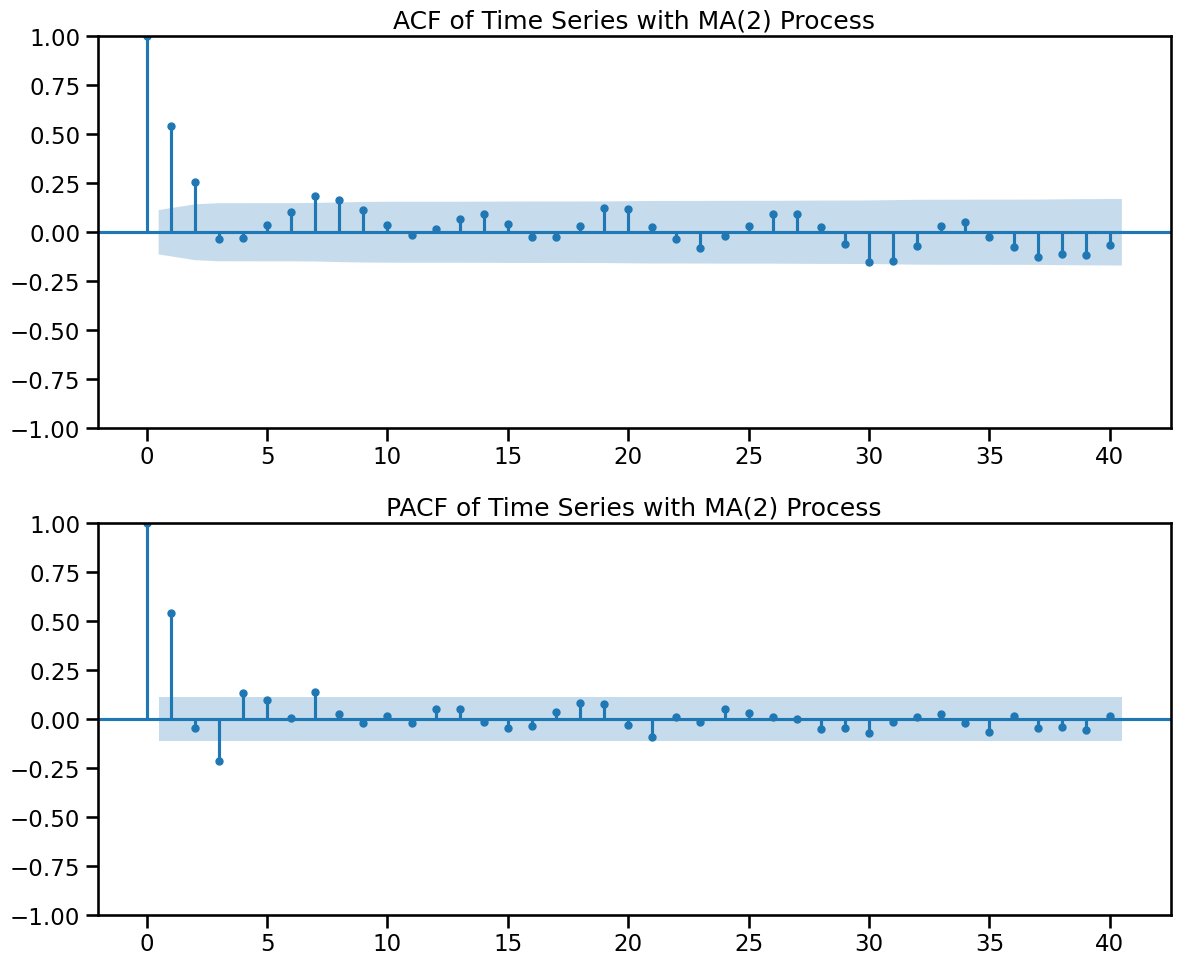

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# MA(2) process parameters
theta_1 = 0.7  # MA(1) coefficient
theta_2 = 0.8  # MA(2) coefficient
mu = 10        # Mean of the process
num_timesteps = 300

# Generate white noise
np.random.seed(0)
epsilon = np.random.normal(size=num_timesteps)

# Generate MA(2) process
y = np.zeros(num_timesteps)
for t in range(2, num_timesteps):
    y[t] = mu + epsilon[t] + theta_1 * epsilon[t-1] + theta_2 * epsilon[t-2]

ts = pd.date_range(start="2000-01-01", periods=num_timesteps, freq="D")

# Create DataFrame
df = pd.DataFrame(data={"y": y}, index=ts)

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['y'])
plt.title('Generated Time Series with MA(2) Process')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot ACF and PACF
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# ACF plot
plot_acf(df['y'], ax=axes[0], lags=40)
axes[0].set_title('ACF of Time Series with MA(2) Process')

# PACF plot
plot_pacf(df['y'], ax=axes[1], lags=40)
axes[1].set_title('PACF of Time Series with MA(2) Process')

plt.tight_layout()
plt.show()
